In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('auto_imports.csv')

In [3]:
data=data.set_axis(['symboling','normalised-losses','make','fuel_type','aspiration','doors',
                    'bodystyle','drive-wheels','engine_location','wheel-base','length','width',
                    'height','curb-weight','engine-type','number_of_cylinders','engine-size',
                    'fuel-system','bore','stroke','compression-ratio','horse-power','peak-rpm',
                    'city-mpg','highway-mpg','price'],axis=1)

In [4]:
pd.set_option('display.max_columns',False)

In [5]:
data

,symboling,normalised-losses,make,fuel_type,aspiration,doors,bodystyle,drive-wheels,engine_location,wheel-base,length,width,height,curb-weight,engine-type,number_of_cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Business case

#### Predicting the price of a car considering various parameters such as mileage,horsepower,fuel type etc.The objective is to build a machine learning model which can predict the price of the car depending upon various features.The predictions will help car dealers to decide on the price of the car.

## Domain Analysis

* Symboling:It corresponds to a degree to which car is more risky than its price <br />
<br />
* Normalised Losses:It represents the relative loss per payment per insured vehicle <br />
<br />
* make:It represents its manufacturer or the producer of the car <br />
<br />
* fuel type:It represents whether the car is petrol or diesel <br />
<br />
* aspiration:It refers to method through which engine sucks air <br />
<br />
* doors:The number of doors that a car has.<br />
<br />
* number of doors:The number of doors in the car <br />
<br />
* bodystyle:It represents the type of car (hatchback/sedan) <br />
<br />
* drive wheels:It corresponds to whether the car is front wheel drive or rear wheel drive <br />
<br />
* engine location:It represents whether the car's engine is at front or rear. <br />
<br />
* wheelbase:It corresponds to the distance between centre of front and rear wheel. <br />
<br />
* length,width,height:Dimensions of the car<br />
<br />
* curb weigh: Total wight of car without any passengers<br />
<br />
* engine type:Type of engine<br />
<br />
* number of cylinders:Number of cylinders in the engine<br />
<br />
* engine size:It refers to the amount of air and fuel that can be pushed through car's cylinders adn is measured in cc<br />
<br />
* fuel system:Type of fuel system <br />
<br />
* bore:diameter of each cylinder <br />
<br />
* compression ratio:ratio between combustion chamber and volume of cylinder <br />
<br />
* horse power:Horse power of engine <br />
<br />
* peak rpm:Maximum rpm that car can reach<br />
<br />
* city-mpg:mileage of car while driving in city<br />
<br />
* highway-mpg:mileage of car while driving on highway<br />
<br />
* price: Price of the car<br />

In [6]:
#Basic checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            200 non-null    int64  
 1   normalised-losses    200 non-null    object 
 2   make                 200 non-null    object 
 3   fuel_type            200 non-null    object 
 4   aspiration           200 non-null    object 
 5   doors                200 non-null    object 
 6   bodystyle            200 non-null    object 
 7   drive-wheels         200 non-null    object 
 8   engine_location      200 non-null    object 
 9   wheel-base           200 non-null    float64
 10  length               200 non-null    float64
 11  width                200 non-null    float64
 12  height               200 non-null    float64
 13  curb-weight          200 non-null    int64  
 14  engine-type          200 non-null    object 
 15  number_of_cylinders  200 non-null    obj

In [7]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [8]:
data.isnull().sum()

symboling              0
normalised-losses      0
make                   0
fuel_type              0
aspiration             0
doors                  0
bodystyle              0
drive-wheels           0
engine_location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type            0
number_of_cylinders    0
engine-size            0
fuel-system            0
bore                   0
stroke                 0
compression-ratio      0
horse-power            0
peak-rpm               0
city-mpg               0
highway-mpg            0
price                  0
dtype: int64

## Data prepocessing

* As per the above there are no missing values in the dataframe,but there are some values with '?',these should be imputed before moving on to EDA
* And some columns are assigned with wrong datatypes which need to be corrected as well

In [9]:
data.replace('?',np.NAN).isnull().sum()

symboling               0
normalised-losses      36
make                    0
fuel_type               0
aspiration              0
doors                   2
bodystyle               0
drive-wheels            0
engine_location         0
wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-type             0
number_of_cylinders     0
engine-size             0
fuel-system             0
bore                    4
stroke                  4
compression-ratio       0
horse-power             2
peak-rpm                2
city-mpg                0
highway-mpg             0
price                   0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            200 non-null    int64  
 1   normalised-losses    200 non-null    object 
 2   make                 200 non-null    object 
 3   fuel_type            200 non-null    object 
 4   aspiration           200 non-null    object 
 5   doors                200 non-null    object 
 6   bodystyle            200 non-null    object 
 7   drive-wheels         200 non-null    object 
 8   engine_location      200 non-null    object 
 9   wheel-base           200 non-null    float64
 10  length               200 non-null    float64
 11  width                200 non-null    float64
 12  height               200 non-null    float64
 13  curb-weight          200 non-null    int64  
 14  engine-type          200 non-null    object 
 15  number_of_cylinders  200 non-null    obj

 Some of the columns are assigned with wrong datatype 

i.Nomralised-losses

In [11]:
data['normalised-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [12]:
#As there is some skewness in the data,missing values should be replaced with median

df_temp=data[data['normalised-losses']!='?']
normalised_median=df_temp['normalised-losses'].astype(int).median()
data.loc[data['normalised-losses']=='?','normalised-losses']=normalised_median


In [13]:
data['normalised-losses']=data['normalised-losses'].astype(int)

ii.bore

In [14]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [15]:
#as the bore is normally distributed,missing values can be replaced with mean
df_temp=data[data['bore']!='?']
bore_mean=df_temp['bore'].astype(float).mean()
data.loc[data['bore']=='?','bore']=bore_mean

In [16]:
data['bore']=data['bore'].astype(float)

iii.stroke

In [17]:
data['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [18]:
#as stroke has skewness in the distribution,missing values must be replaced with median

df_temp=data[data['stroke']!='?']
stroke_median=df_temp['stroke'].astype(float).median()
data.loc[data['stroke']=='?','stroke']=stroke_median

In [19]:
data['stroke']=data['stroke'].astype(float)

iv.horse power

In [20]:
data['horse-power'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [21]:
#as horse power has skewness,missing values must be replaced with median

df_temp=data[data['horse-power']!='?']
horsepower_median=df_temp['horse-power'].astype(int).mean()
data.loc[data['horse-power']=='?','horse-power']=horsepower_median

In [22]:
data['horse-power']=data['horse-power'].astype(int)

v.peak-rpm

In [23]:
data['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '?', '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [24]:
#as peak rpm has normal distribution,missing values can be replaced with mean

df_temp=data[data['peak-rpm']!='?']
peakrpm_mean=df_temp['peak-rpm'].astype(int).mean()
data.loc[data['peak-rpm']=='?','peak-rpm']=peakrpm_mean

In [25]:
data['peak-rpm']=data['peak-rpm'].astype(int)

vi.doors

In [26]:
data['doors'].value_counts()

four    113
two      85
?         2
Name: doors, dtype: int64

In [27]:
#replacing missing value with most frequent value
data.loc[data['doors']=='?','doors']='four'

In [28]:
data['price']=data['price'].astype(int)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            200 non-null    int64  
 1   normalised-losses    200 non-null    int32  
 2   make                 200 non-null    object 
 3   fuel_type            200 non-null    object 
 4   aspiration           200 non-null    object 
 5   doors                200 non-null    object 
 6   bodystyle            200 non-null    object 
 7   drive-wheels         200 non-null    object 
 8   engine_location      200 non-null    object 
 9   wheel-base           200 non-null    float64
 10  length               200 non-null    float64
 11  width                200 non-null    float64
 12  height               200 non-null    float64
 13  curb-weight          200 non-null    int64  
 14  engine-type          200 non-null    object 
 15  number_of_cylinders  200 non-null    obj

In [30]:
#splitting the data into numerical and categorical columns

In [31]:
data_num=data.select_dtypes(include=['int','float'])
data_num

,symboling,normalised-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [32]:
data_cat=data.select_dtypes(include='object')
data_cat

,make,fuel_type,aspiration,doors,bodystyle,drive-wheels,engine_location,engine-type,number_of_cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
195,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## Exploratory Data Analysis

In [33]:
data_cat['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [34]:
#sweetviz gives the quick overview about the data
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
#lets look at how the each of features are distributed

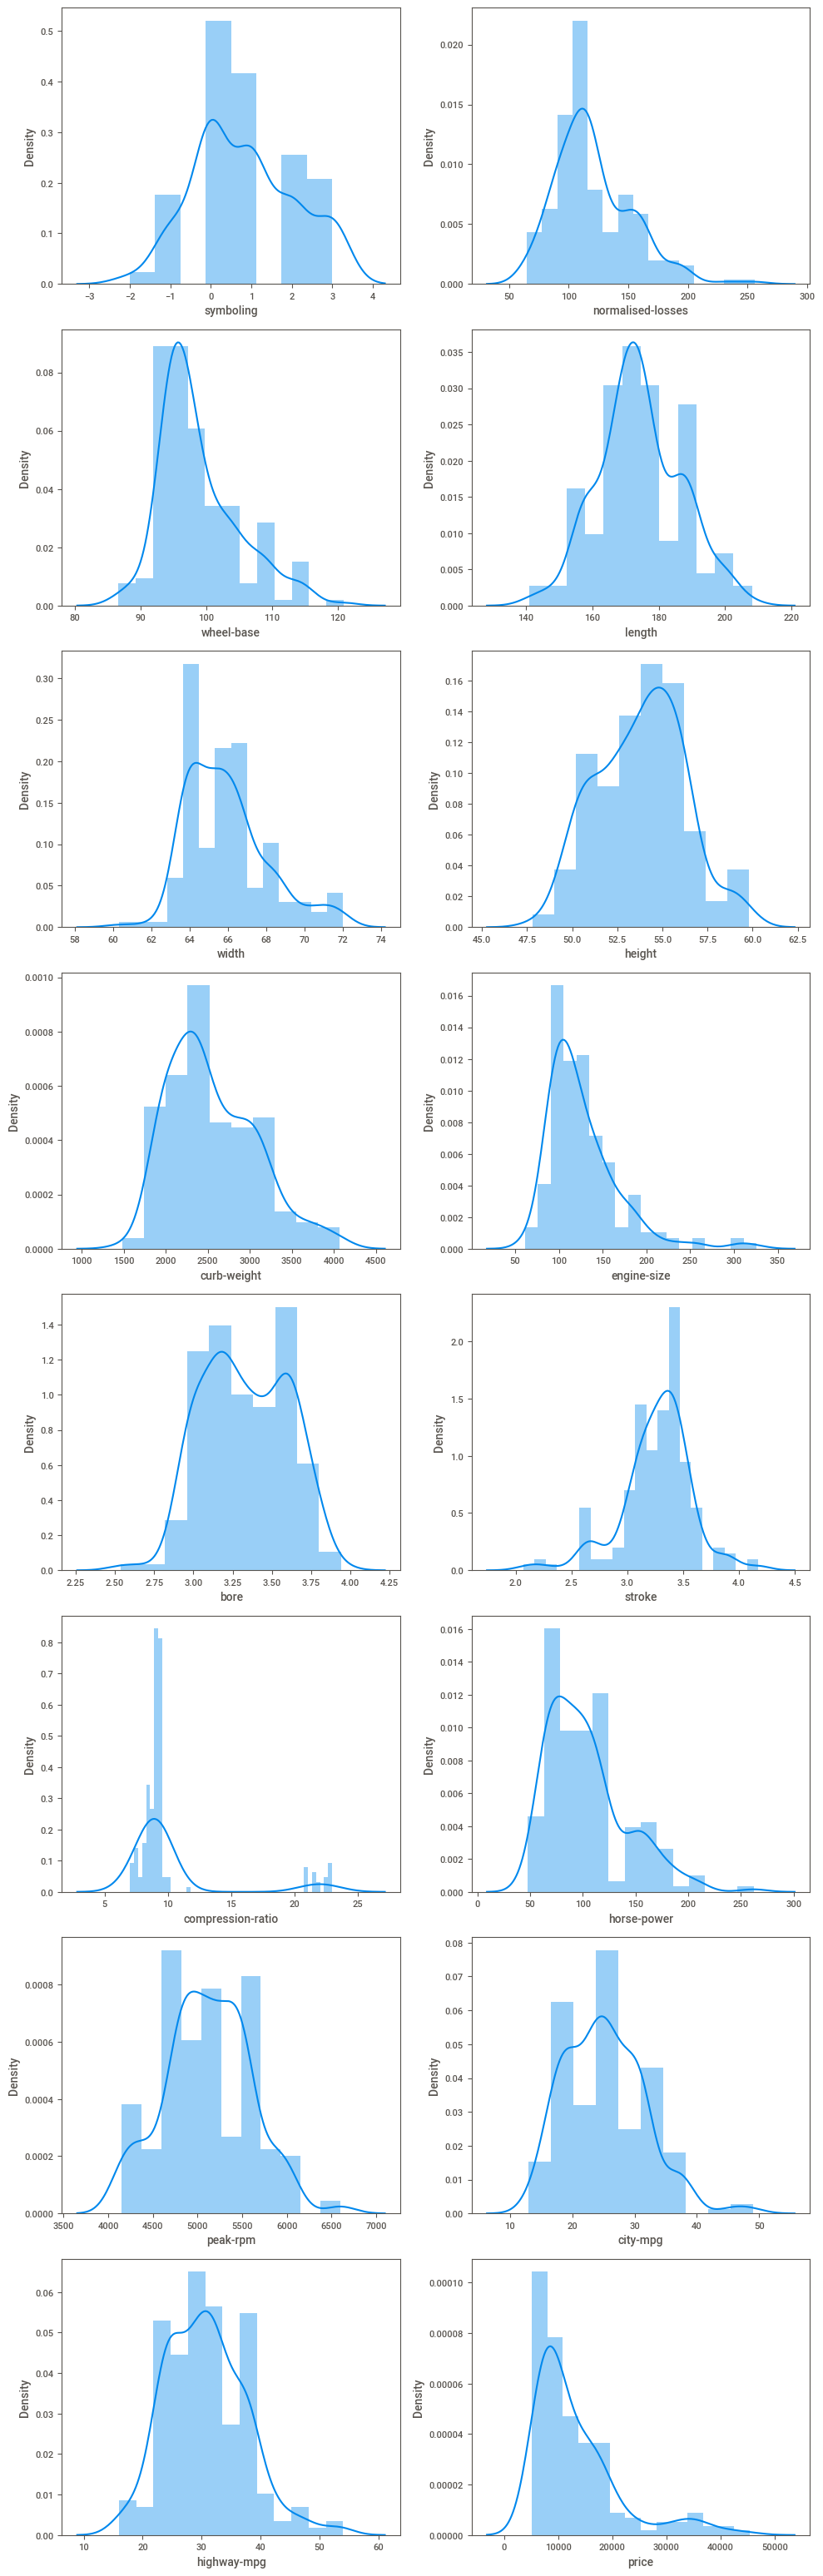

In [36]:
plt.figure(figsize=(10,50))
plot_number=1

for i in data_num:
    if plot_number<=16:
        ax=plt.subplot(13,2,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize='10')
    plot_number+=1
plt.tight_layout()
plt.show()

#### findings
* Most of the normalised loss lies in the range of 80-130.
* 92-100 is the ideal wheel base that customers prefer most often.
* The ideal curb weight is 1800-3200 which depends on lenght,width,height and engine size of the car.
* Preferred city mpg is 18-35 where as highway mpg is around 22-38.
* Most of the cars have compression ratio between 8 to 9.

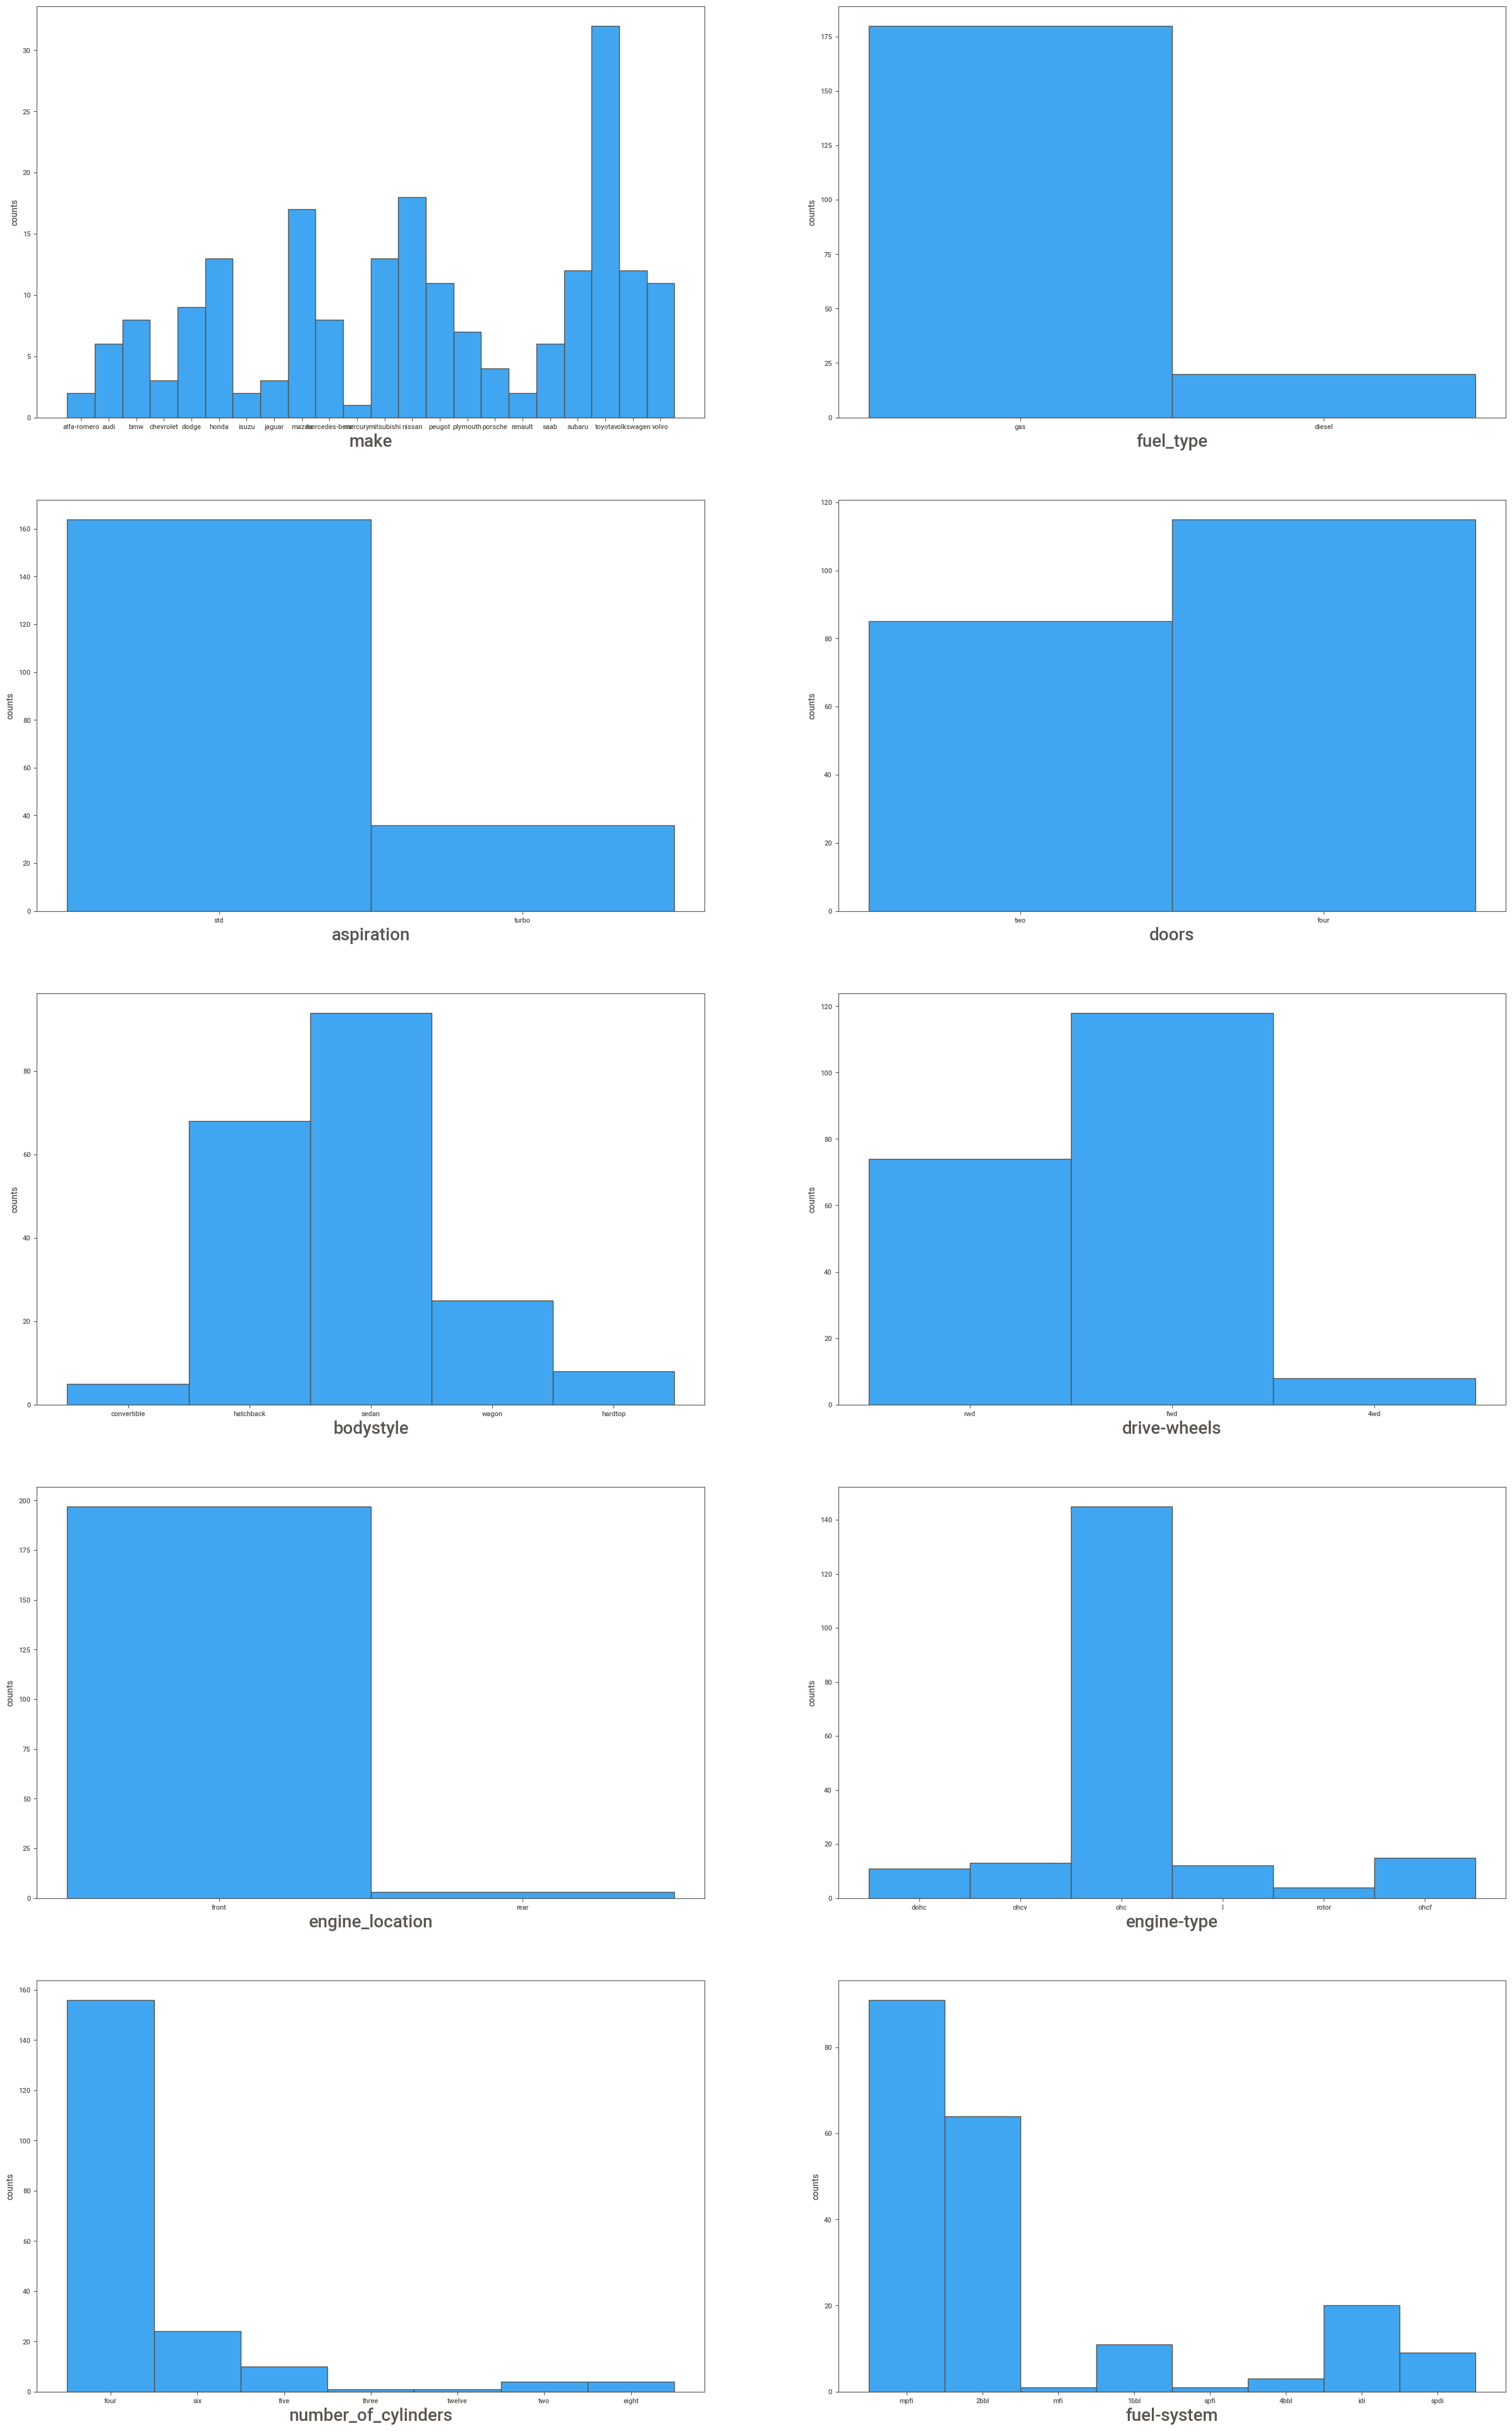

In [37]:
#Visualizing categorical data
plt.figure(figsize=(30,50))
plot_number=1
for i in data_cat:
    if plot_number<=10:
        ax=plt.subplot(5,2,plot_number)
        sns.histplot(data[i])
        plt.xlabel(i,fontsize='20')
        plt.ylabel('counts')
    plot_number+=1

#### Findings
* Toyota is the make with highest sales and mercury being the least.
* Customers prefer cars with fueltype gas over diesel and aspiration standard over turbo
* Sedan and hatchback are the most preferred bodystyle of cars and 90% customers prefer ofc type of engine.
* More than 90% of the cars have engine at front and customers prefer four cylinder cars over the others

### Bivariate analysis

#### Make and Price

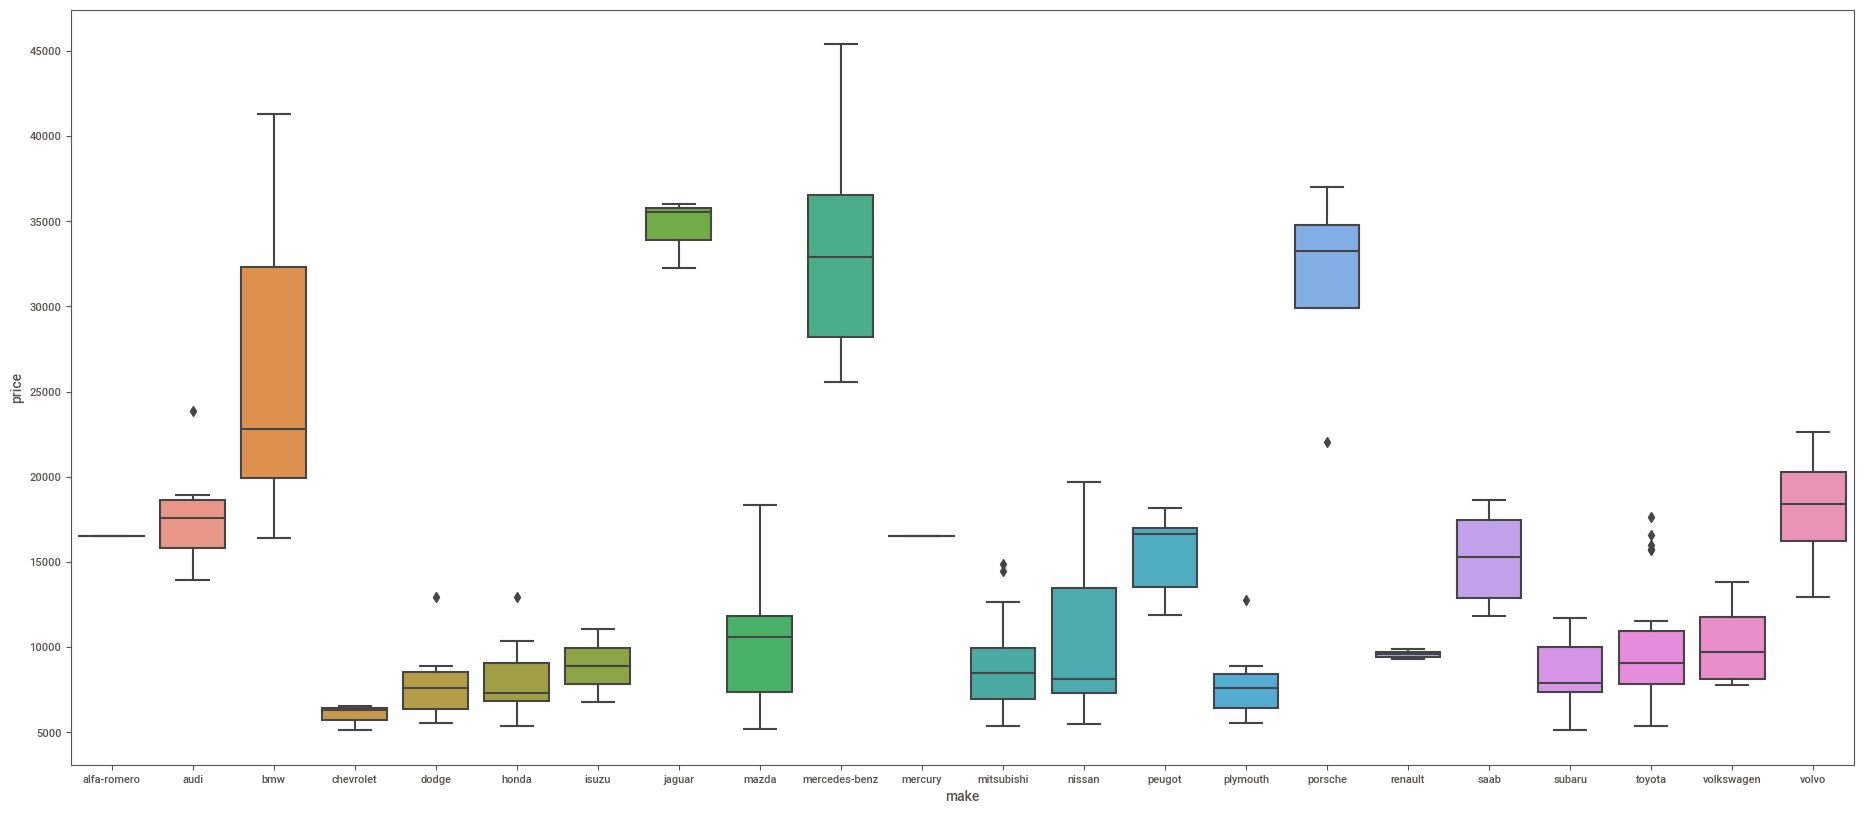

In [38]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(x=data['make'],y=data['price'])
plt.show()

* Mercedes-benz has the highest price.
* Subaru has the car with lowest price.
* BMW cars have the average price.

#### Mileage and Price w.r.t Price

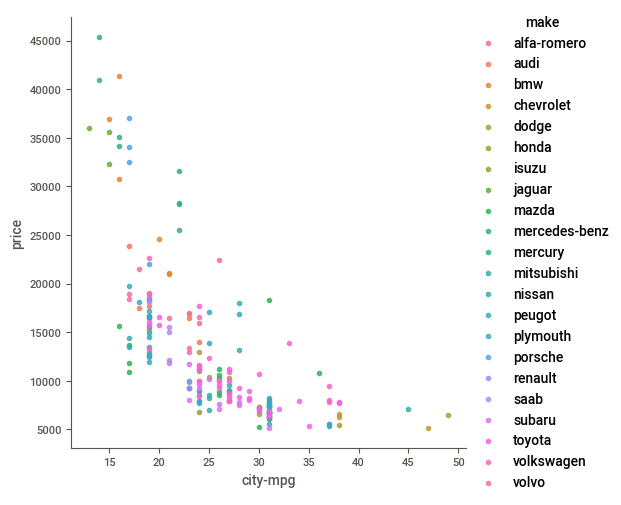

In [39]:
sns.lmplot(data=data,x='city-mpg',y='price',hue='make',fit_reg=False)
plt.show()

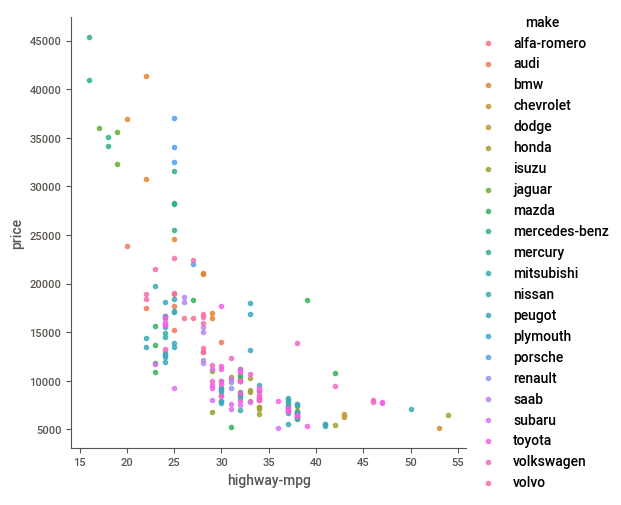

In [40]:
sns.lmplot(data=data,x='highway-mpg',y='price',hue='make',fit_reg=False)
plt.show()

* As the mileage increases price is decreasing because mileage is negatively correlated with horse power.(Higher the horsepower higher the price)
* Honda has the highest highway mpg,Mercedes -benz being the lowest.
* Toyota has the moderate mileage with average price as well.


#### Horse power and Price w.r.t Make

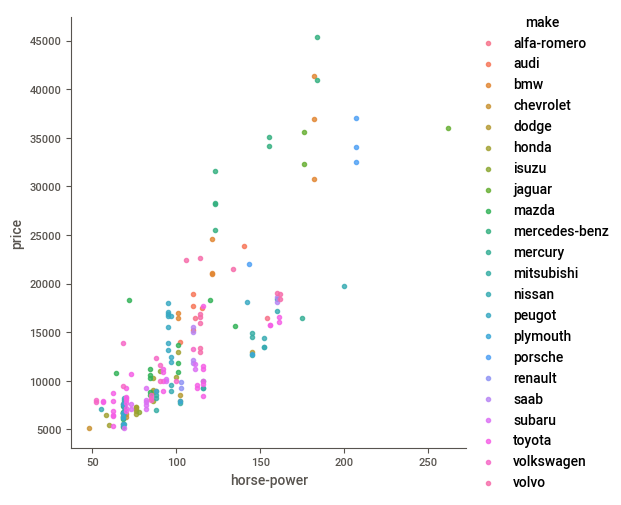

In [41]:
sns.lmplot(data=data,x='horse-power',y='price',hue='make',fit_reg=False)
plt.show()

* Price is positively correlated with horse power.
* Chevrolet has the lowest horsepower and Jaguar being the car with highest horse power.
* Most of the cars have horse power between 5000-18000
* There are only few cars with horse power higher than 30000

#### Bodystyle and Price

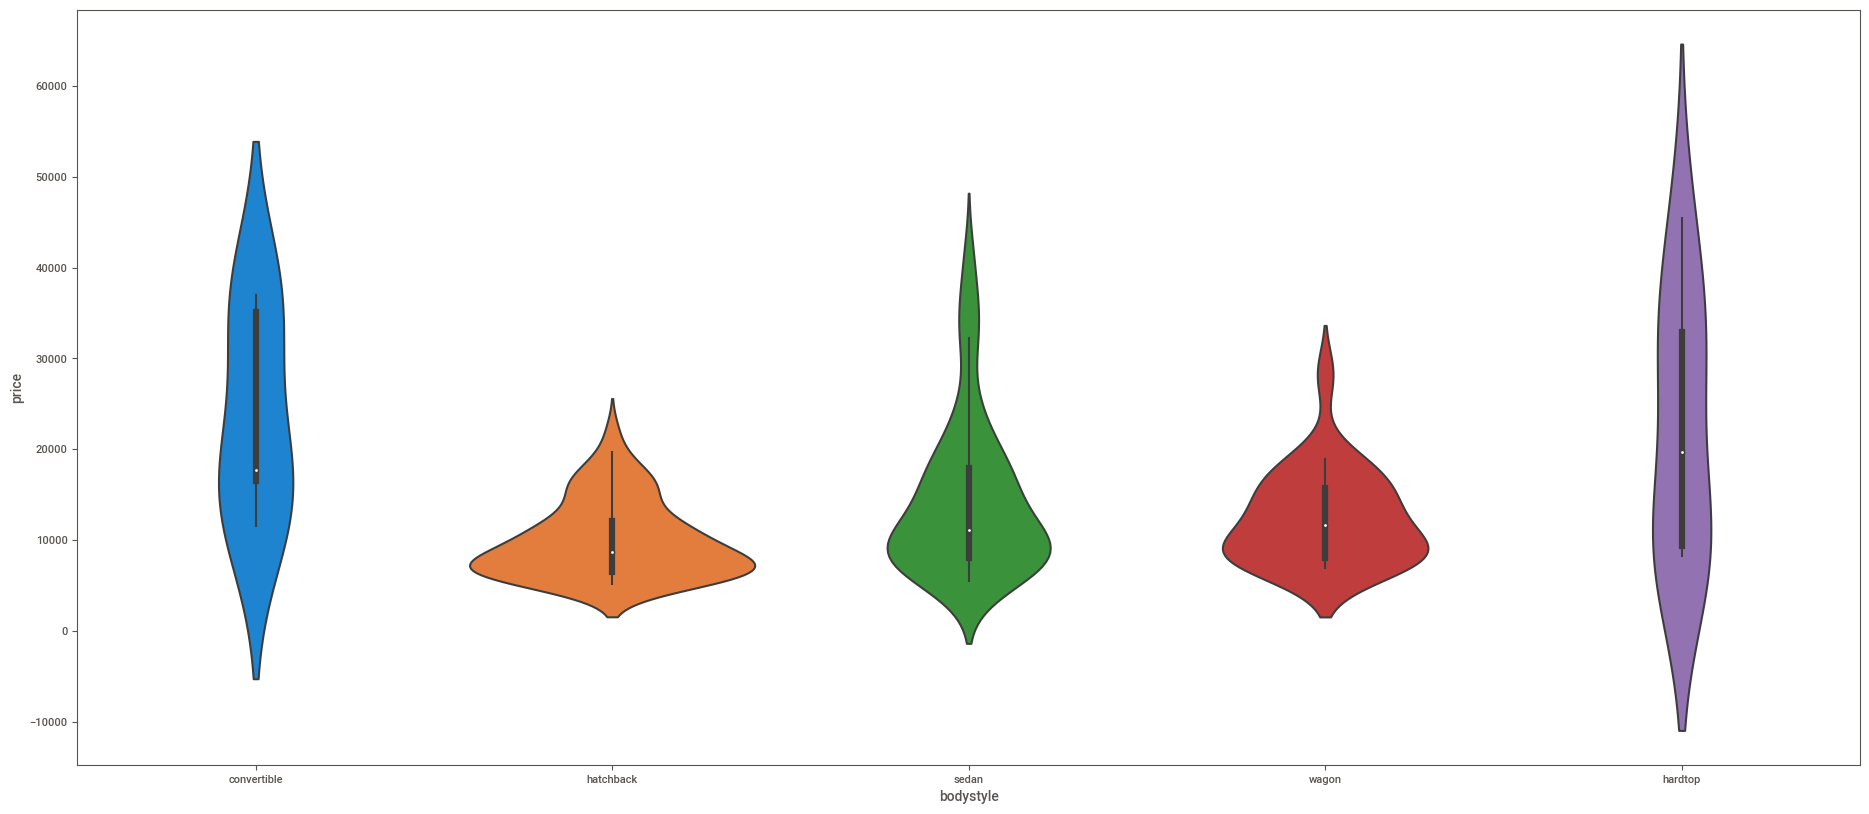

In [42]:
sns.violinplot(x='bodystyle',y='price',data=data)
plt.show()

* Cars with bodystyle hardtop and convertible have higher price than other bodystyles.
* Cars with sedan bodystyle have moderate price.

#### Symboling and bodystyle with respect to price

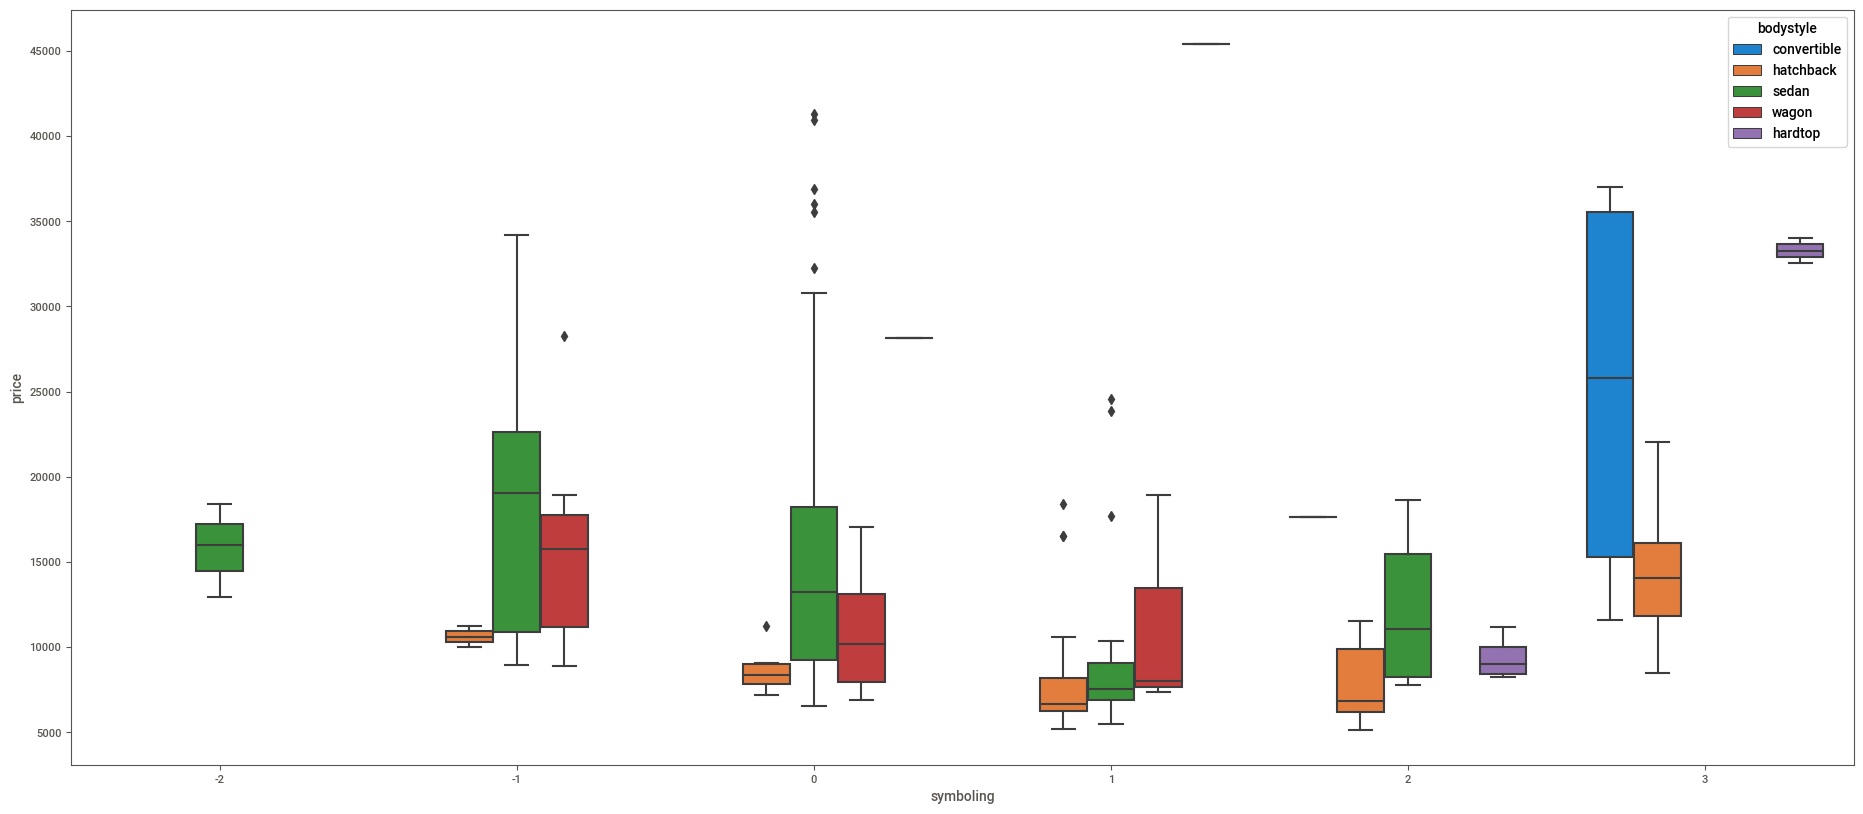

In [43]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(x=data['symboling'],y=data['price'],hue=data['bodystyle'])
plt.show()

* Here -2 refers to low risk and +3 being the high risk
* Cars with less risk i.e symboling<0 are having higher price compared to that of other and most of them are with bodystyle sedan.
* Even though convertible cars have high risk still the price is higher compared to sedan.
* Hatchback cars have higher risk hence the price is also on lower side.
* Wagon cars have comparitively less risk than hatchback and convertible with moderate price range.

### Aspiration and Engine type with respect to Price

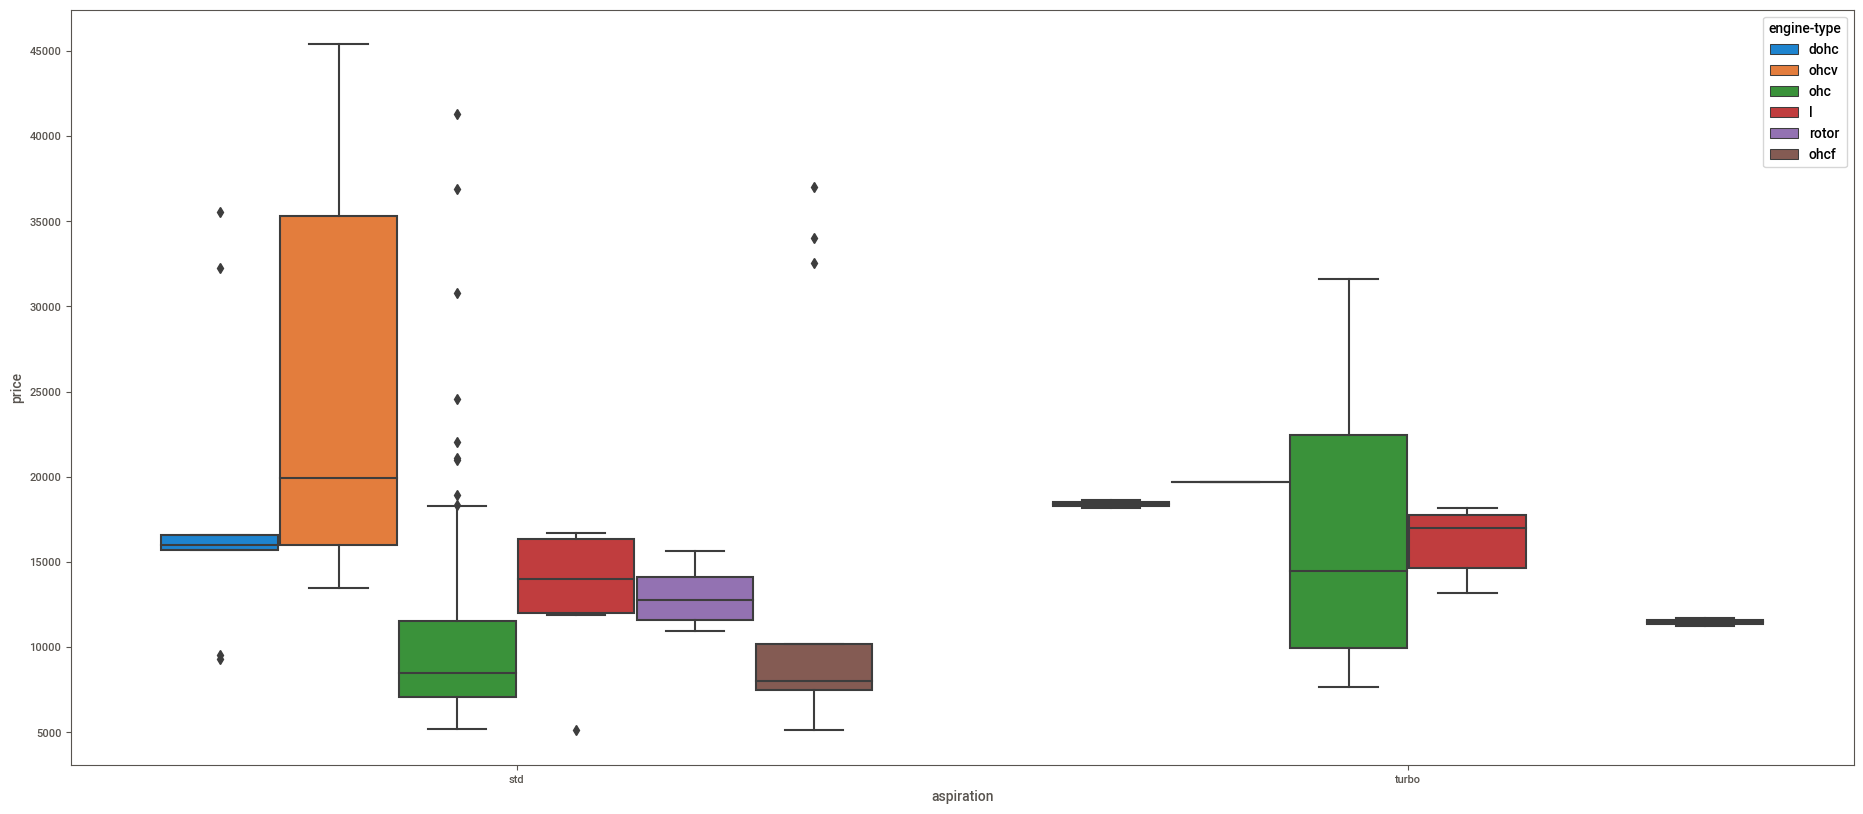

In [44]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=data,y='price',x='aspiration',hue='engine-type')
plt.show()

#### Findings
* There are no cars with engine type ohcv and rotor with aspiration as turbo.
* Cars with ohcv engines have higher price compared to other cars with other engines.
* Cars with ohcf engines are the cheapest comparitively.

#### Engine size and Curb weight

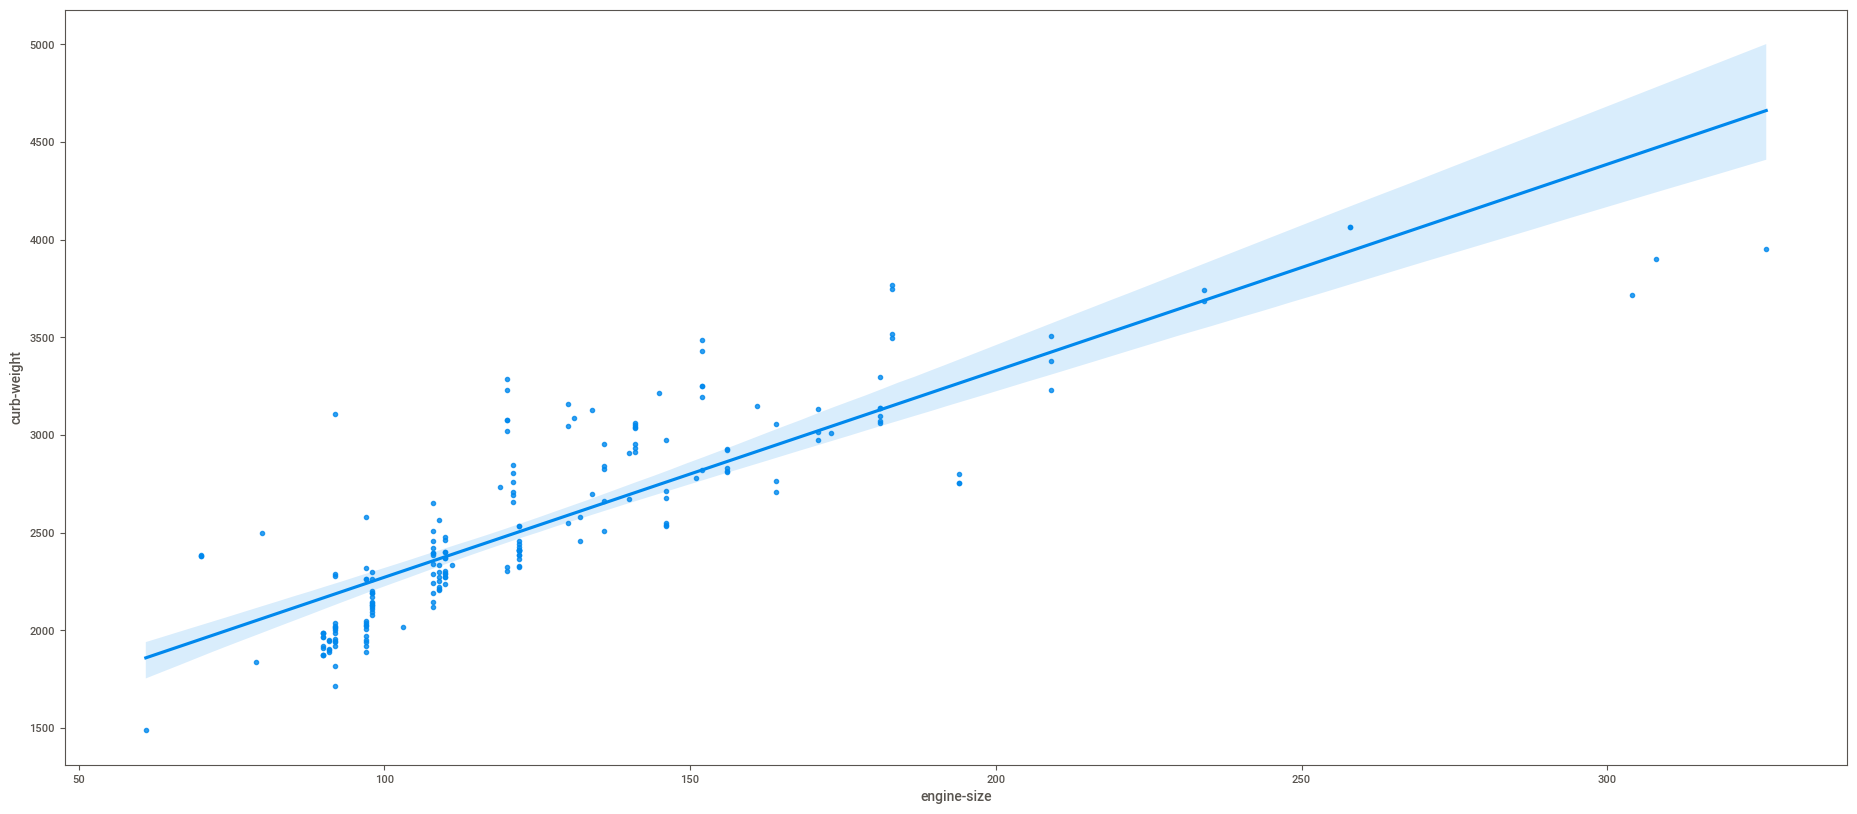

In [45]:
sns.regplot(data=data,x='engine-size',y='curb-weight')
plt.show()

* as the engine size is increasing the curb weight is also increasing
* And it is obvious that the length,breadth and width of the car are also directly proportional to curb weight.

#### Engine type and number of cylinders w.r.t mileage in city

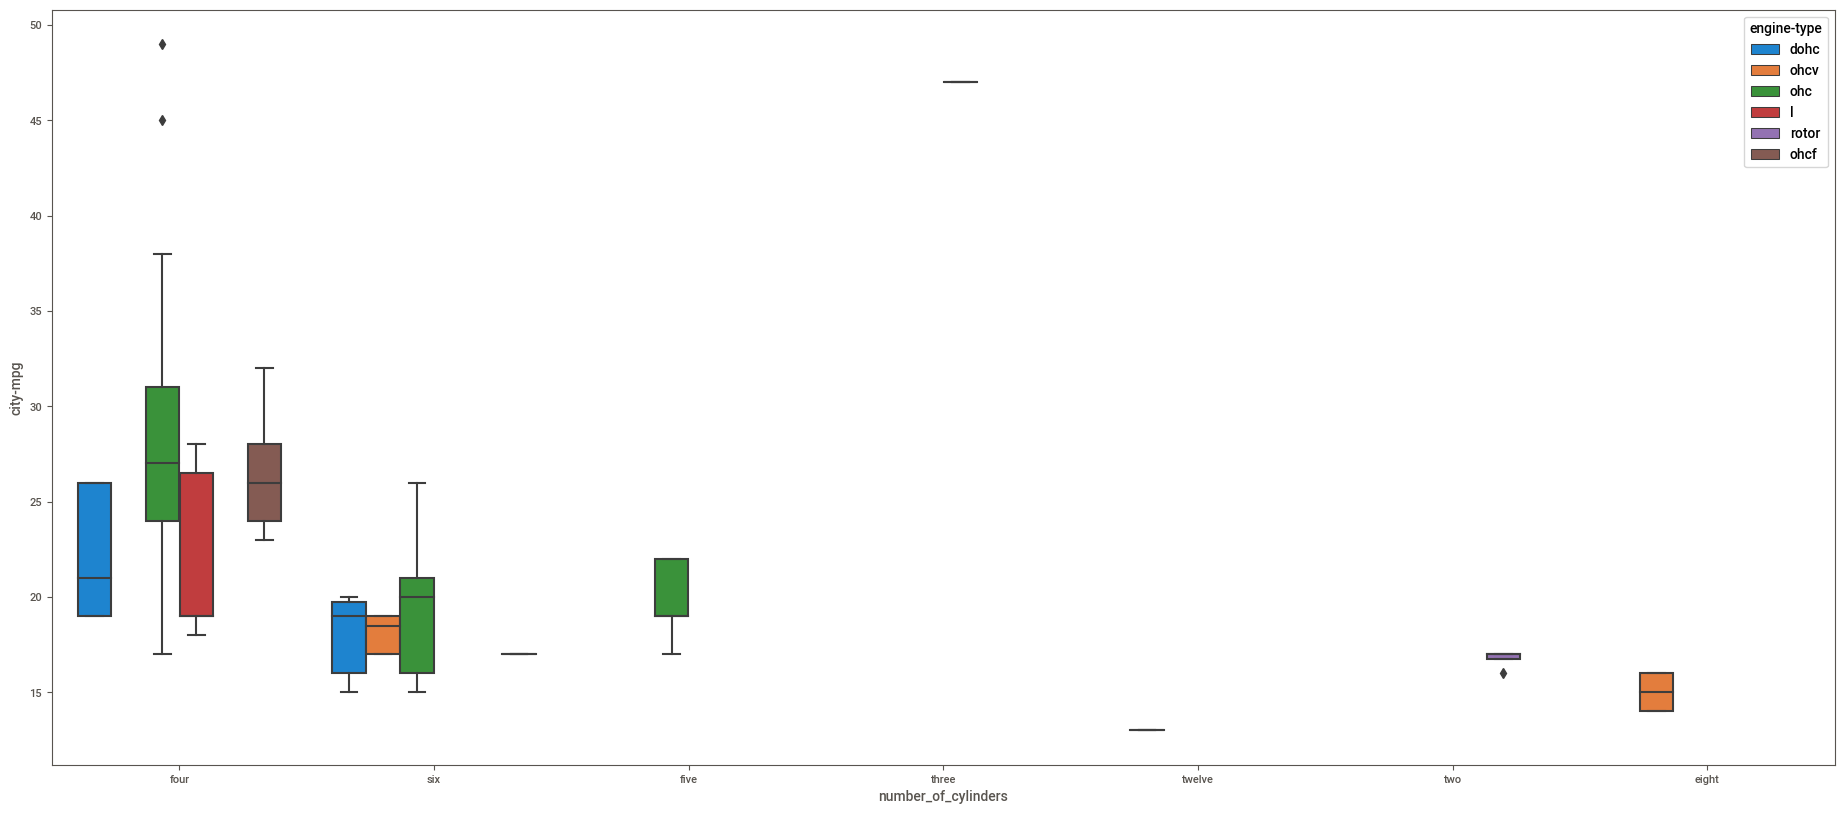

In [46]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=data,x='number_of_cylinders',y='city-mpg',hue='engine-type')
plt.show()

* Cars that run with ohc engines and four cylinders have comparitively higher mileage.
* Eight cylindered engine with ohcv has the least mileage.
* Cars with dohc engines have moderate mileage.

#### Engine type and number cylinders w.r.t mileage in city

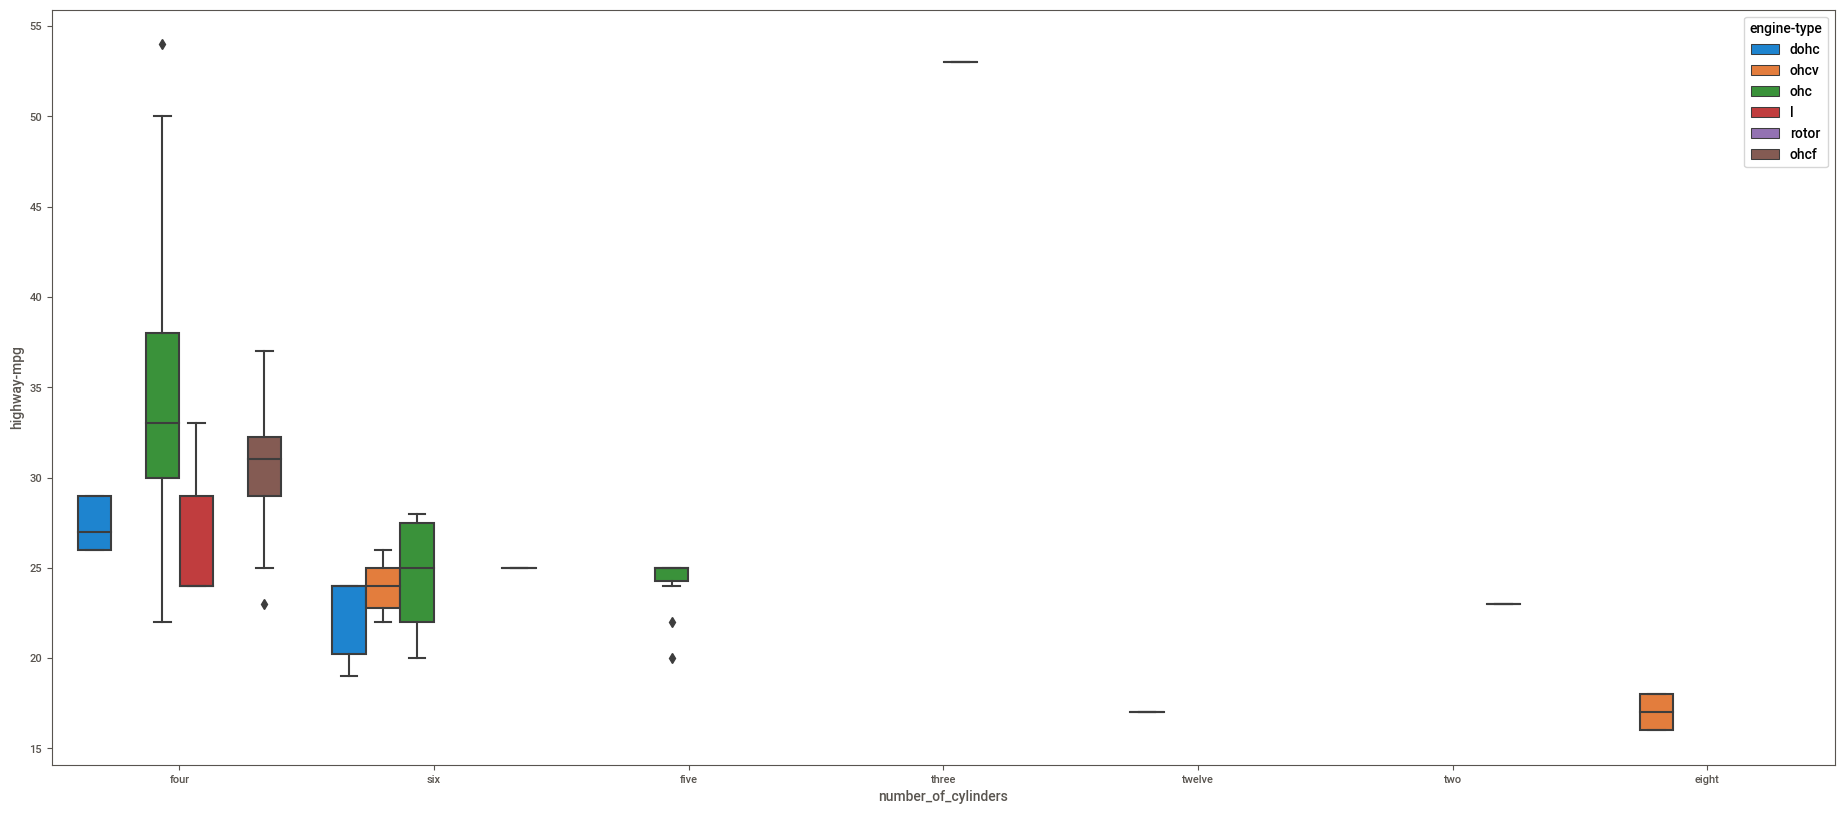

In [47]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=data,x='number_of_cylinders',y='highway-mpg',hue='engine-type')
plt.show()

* There is not much notable difference in observations b/w highway mpg and city mpg
* Both the graphs convey the same information.

#### Horse power and mpg

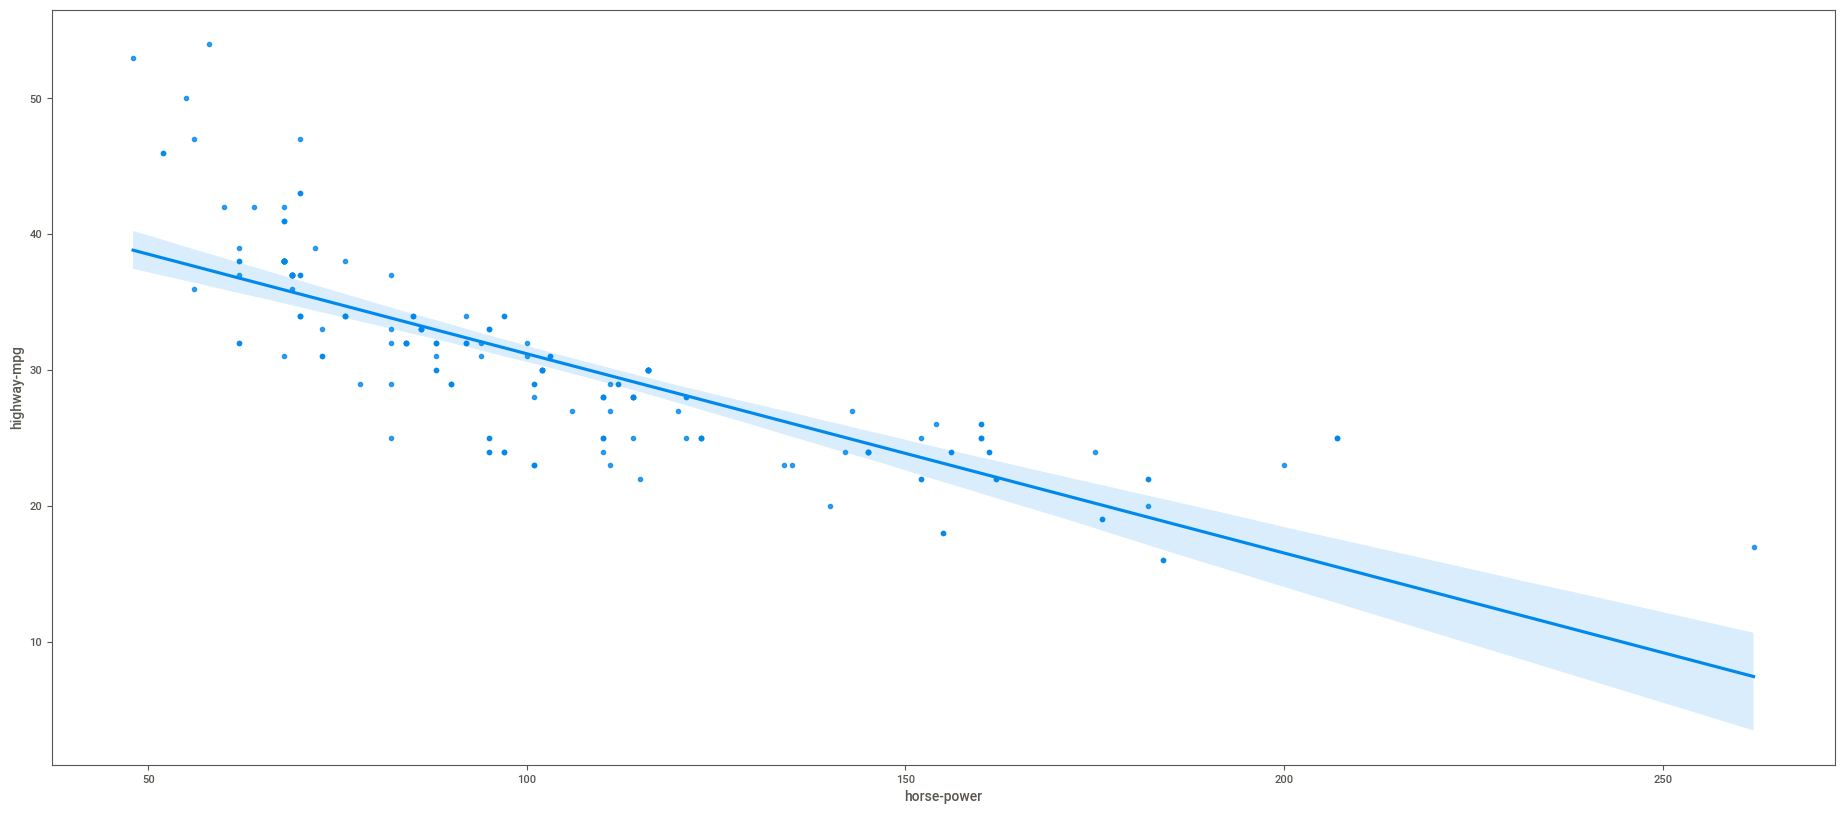

In [48]:
sns.regplot(data=data,x='horse-power',y='highway-mpg')
plt.show()

* As the horse power is increasing the mileage is dropping and it will be same case with the city mpg as well.

#### Horse power and Price

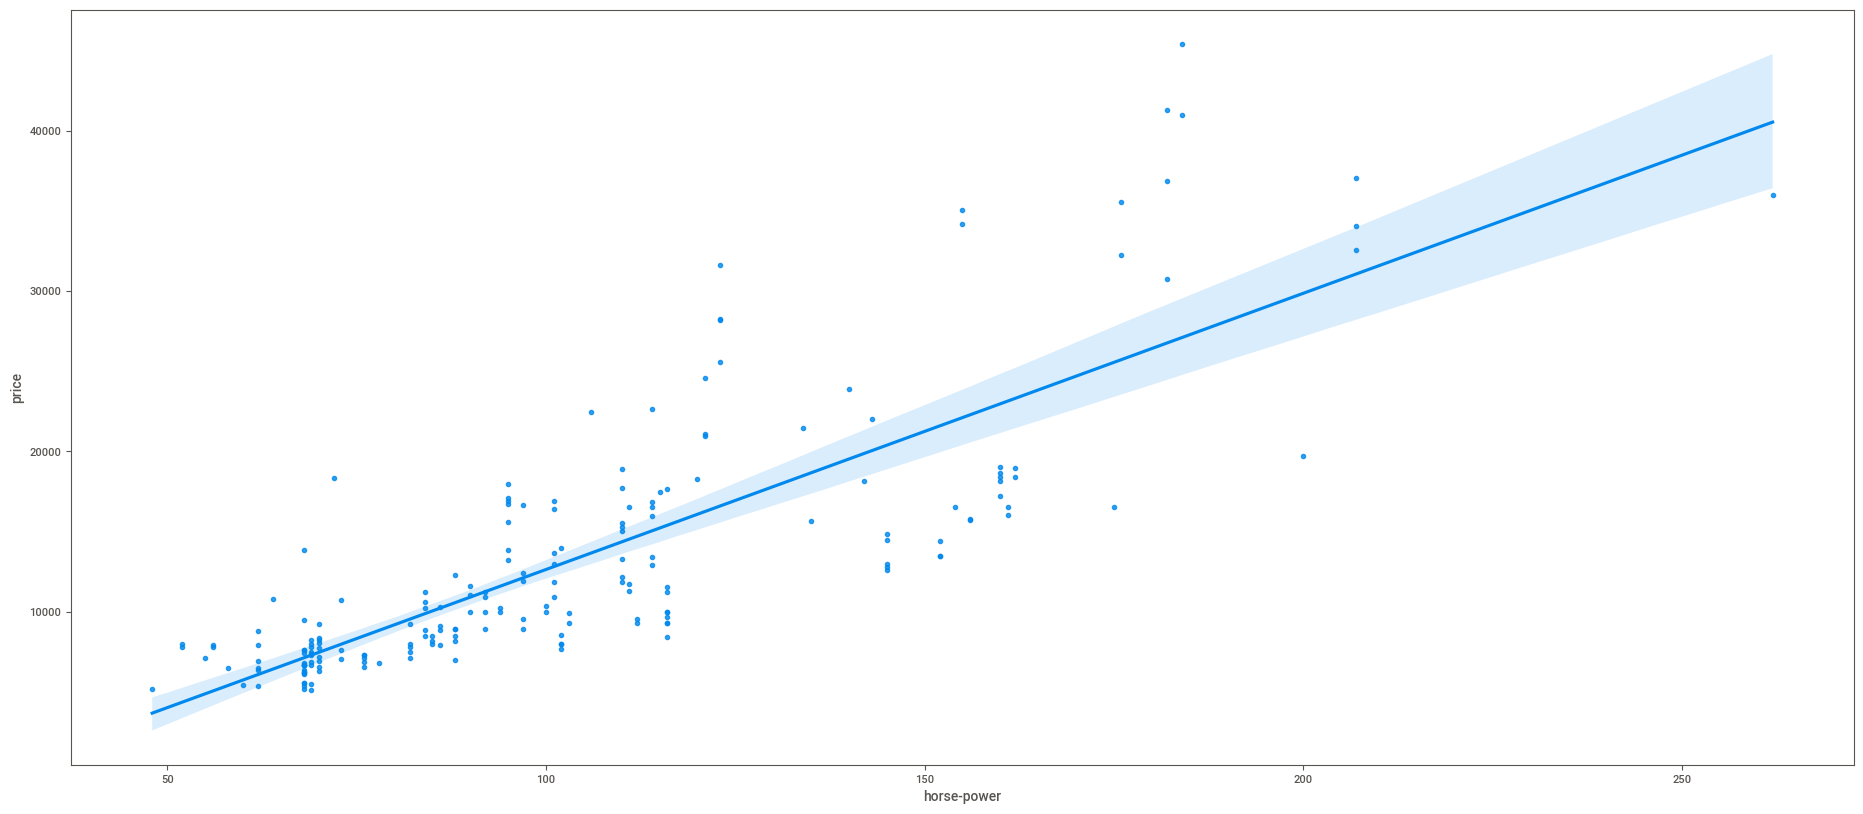

In [49]:
sns.regplot(data=data,x='horse-power',y='price')
plt.show()

* The price is directly proportional to horse power
* As the horsepower is increasing price is also increasing

#### MPG and Price

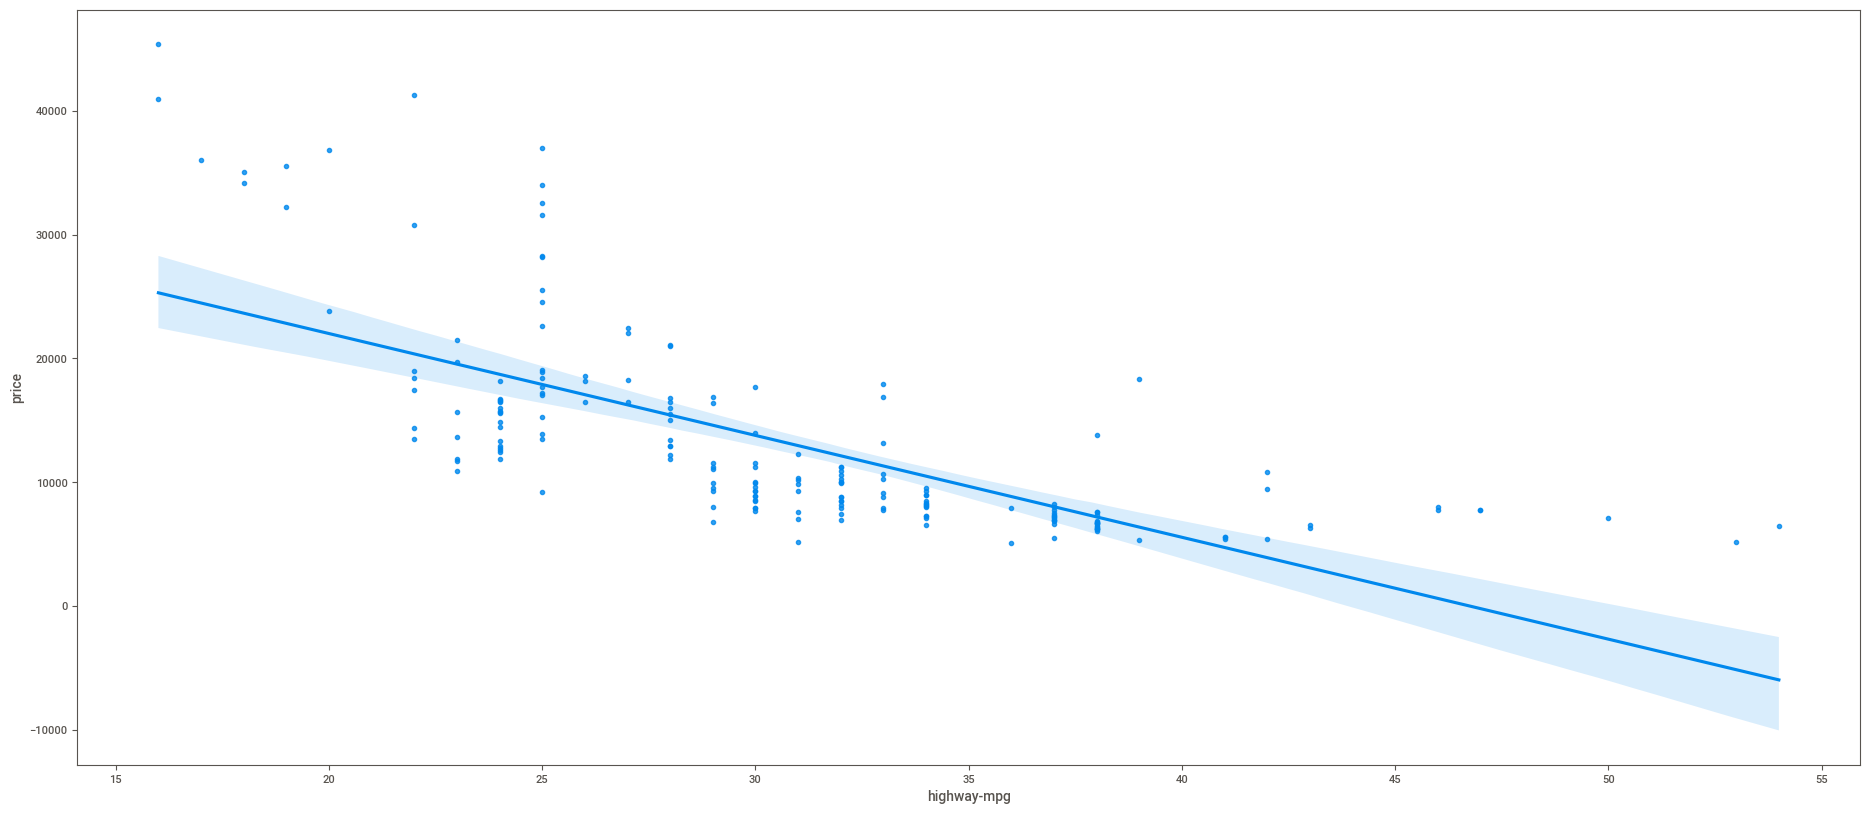

In [50]:
sns.regplot(data=data,x='highway-mpg',y='price')
plt.show()

* The cars with least mileage have higher price i.e because as we saw earlier price increases with increase in horse power which is negatively correlated with mileage

#### Fuel type and mileage

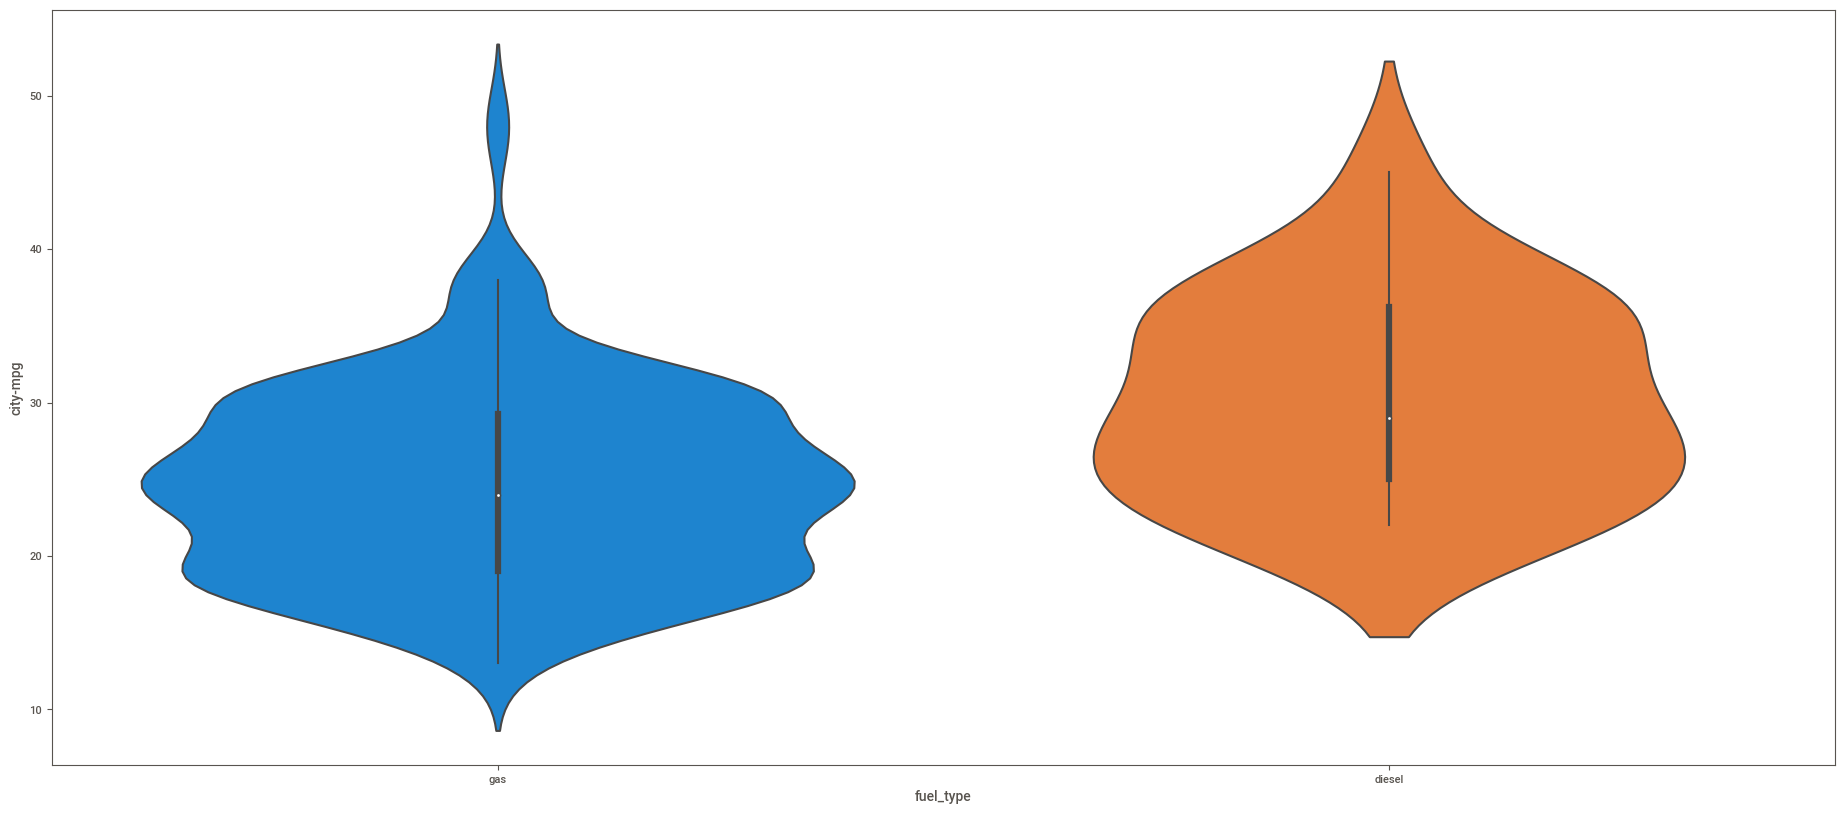

In [51]:
sns.violinplot(data=data,x='fuel_type',y='city-mpg')
plt.show()

* The diesel cars have higher mileage than cars with fuel type petrol.

#### Fuel type and Price

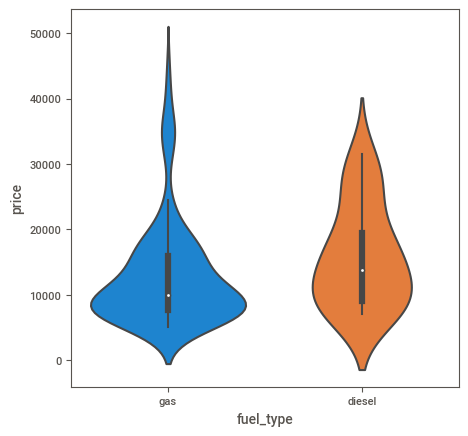

In [52]:
plt.rcParams['figure.figsize']=(5,5)
sns.violinplot(data=data,x='fuel_type',y='price')
plt.show()

* Cars with fuel type Gas have some cars with higher price than that of diesel.
* Most of the petrol cars range between 10k to 20k dollars.

#### Fuel type and Fuel system w.r.t Price

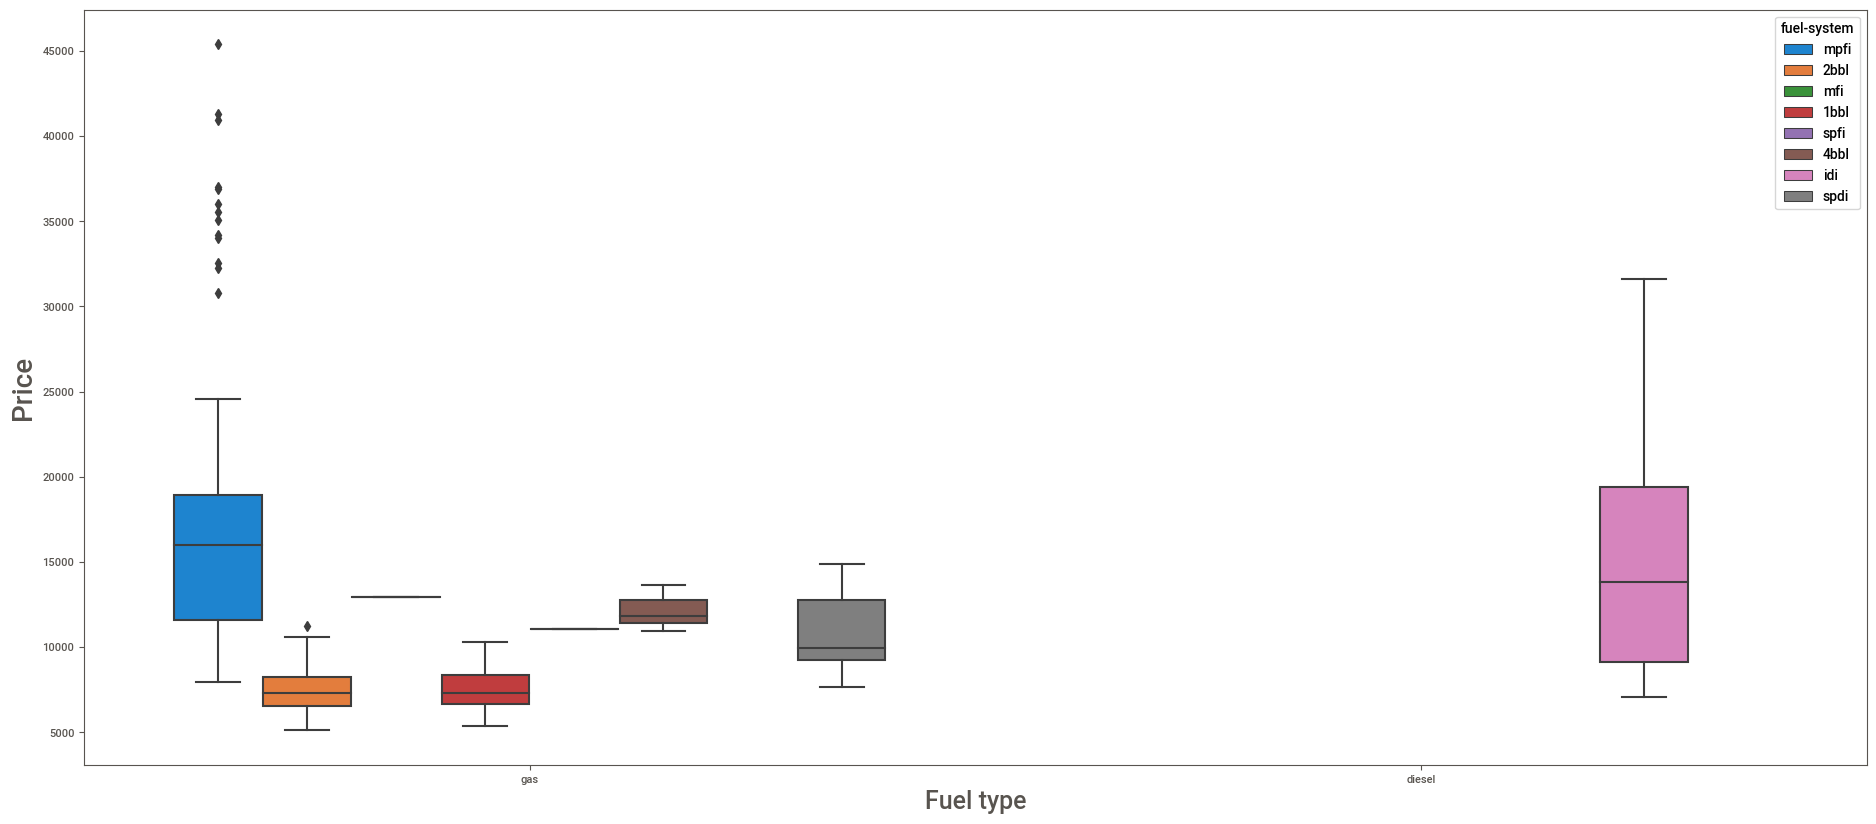

In [53]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=data,hue='fuel-system',y='price',x='fuel_type')
plt.xlabel('Fuel type',fontsize='18')
plt.ylabel('Price',fontsize='20')
plt.show()

* mpfi fuel system has higher cost than any other type of fuel systems.
* diesel cars come with only IDI type of fuel system

#### Bore and Horse-power w.r.t Bodystyle

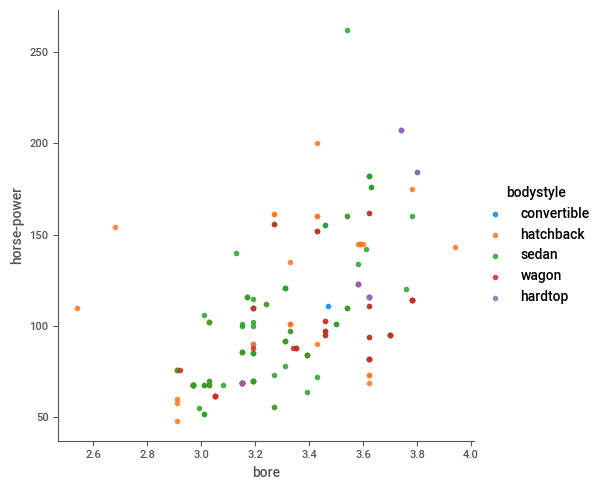

In [54]:
sns.lmplot(data=data,x='bore',y='horse-power',hue='bodystyle',fit_reg=False)
plt.show()

* As the diameter of cylinder(bore) is increasing horse power is increasing as well.
* Hatchback cars have horse power ranging from 50 all the way upto 200.
* Sedan type of bodystyle has the highest horse power and many cars with horsepower 50 to 120 as well.

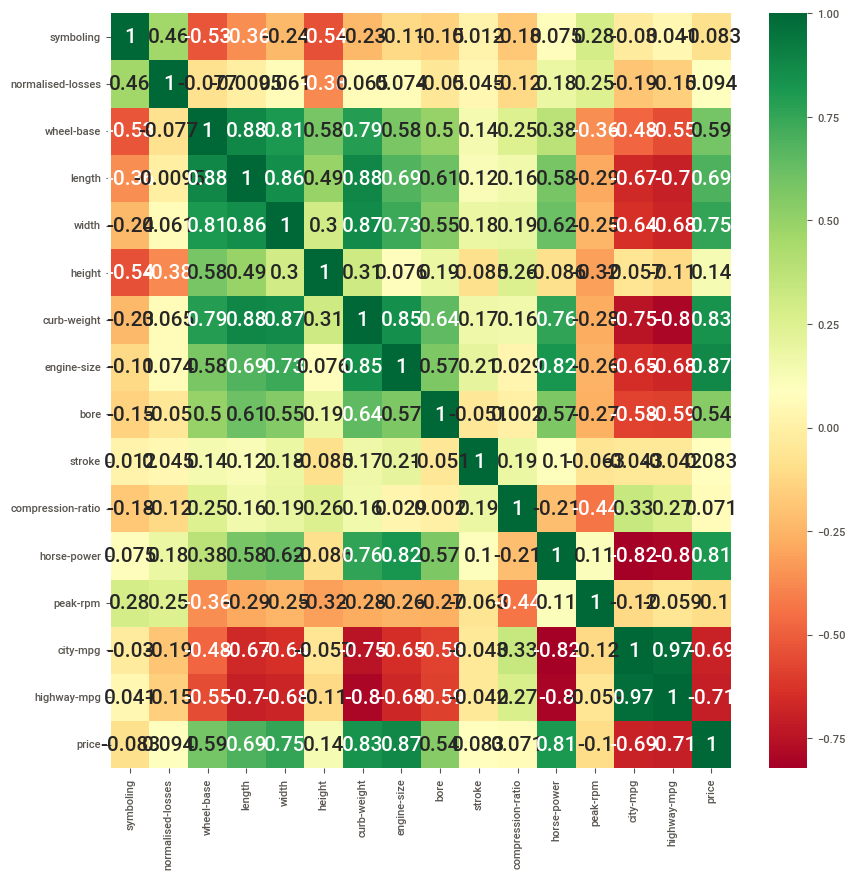

In [55]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

## Handling the outliers

In [56]:
data_num

,symboling,normalised-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,2,115,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


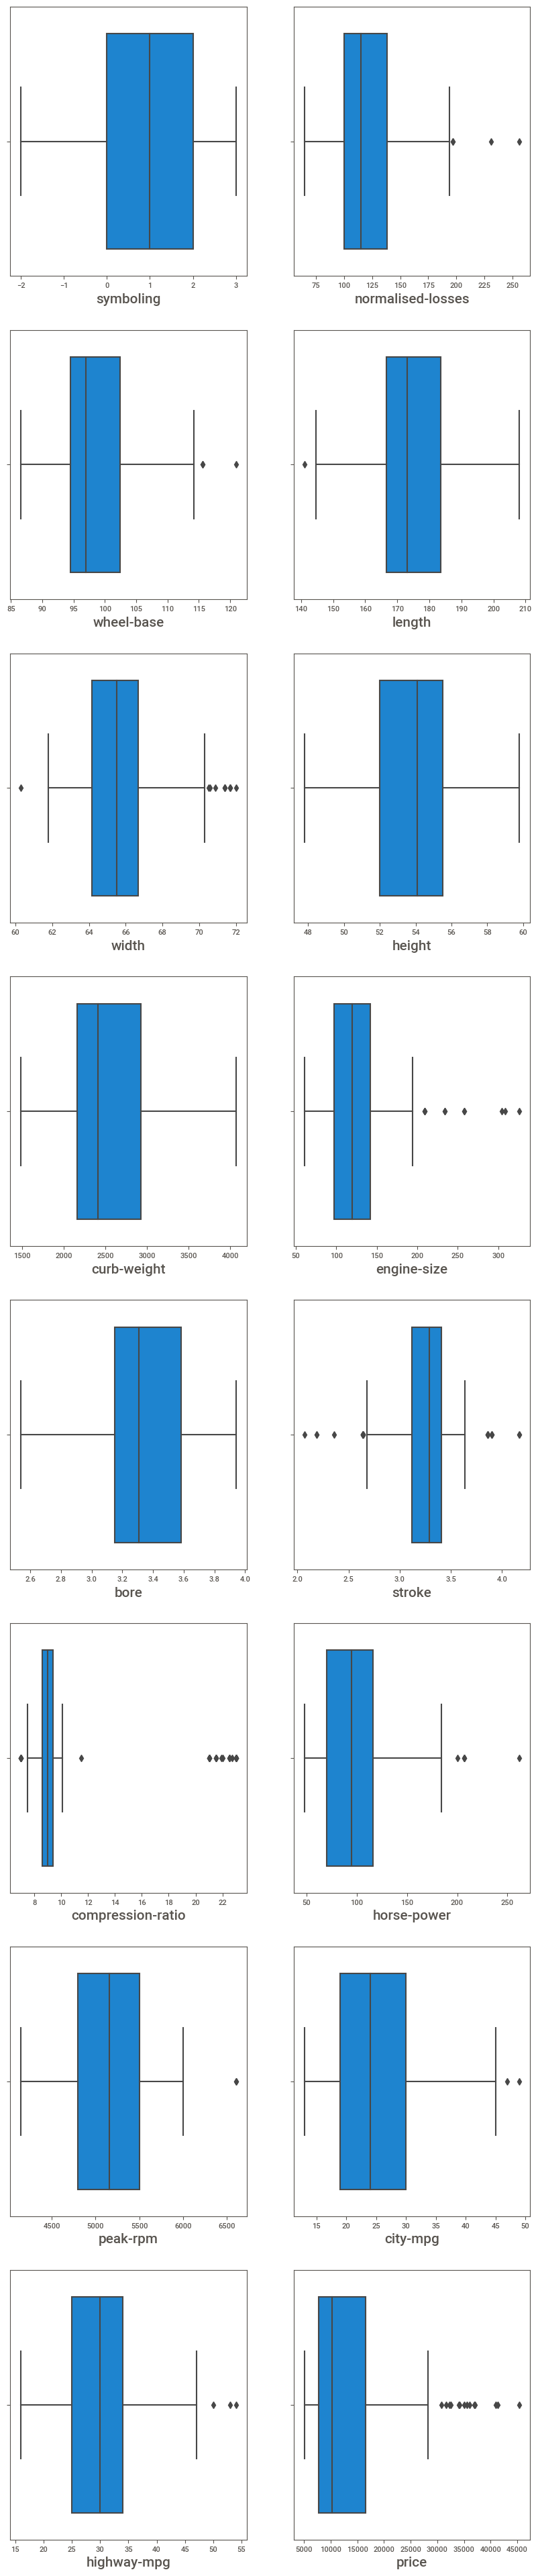

In [57]:
plt.figure(figsize=(10,50))
plot_number=1
for column in data_num:
    if plot_number<=16:
        ax=plt.subplot(8,2,plot_number)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize='15')
    plot_number+=1

* As we can see there are few outliers in most of the columns as per the plot.But it is better not to fix them since the various parameters of a car vary from maufacturer to manufacturer depending upon the horse power/weight/type of car.
* For eg:The plot shows there some outliers in horsepower feature but the fact is some cars have much higher horse power than the average cars.

## Encoding

In [58]:
data_cat

,make,fuel_type,aspiration,doors,bodystyle,drive-wheels,engine_location,engine-type,number_of_cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
195,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


We can remove feature 'make',as it doesnt help much for model to predict price.

In [59]:
data_cat.drop('make',axis=1,inplace=True)

In [60]:
data_cat

,fuel_type,aspiration,doors,bodystyle,drive-wheels,engine_location,engine-type,number_of_cylinders,fuel-system
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
195,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [61]:
data_cat_nominal=data_cat.drop(['doors','number_of_cylinders'],axis=1)

#### Doors

In [62]:
data_cat['doors'].value_counts()

four    115
two      85
Name: doors, dtype: int64

In [63]:
data_cat.loc[data_cat['doors']=='four','doors']=4

In [64]:
data_cat.loc[data_cat['doors']=='two','doors']=2

In [65]:
data_cat['doors'].value_counts()

4    115
2     85
Name: doors, dtype: int64

#### number_of_cylinders

In [66]:
data_cat['number_of_cylinders'].value_counts()

four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: number_of_cylinders, dtype: int64

In [67]:
data_cat.loc[data_cat['number_of_cylinders']=='four','number_of_cylinders']=4
data_cat.loc[data_cat['number_of_cylinders']=='six','number_of_cylinders']=6
data_cat.loc[data_cat['number_of_cylinders']=='five','number_of_cylinders']=5
data_cat.loc[data_cat['number_of_cylinders']=='two','number_of_cylinders']=2
data_cat.loc[data_cat['number_of_cylinders']=='eight','number_of_cylinders']=8
data_cat.loc[data_cat['number_of_cylinders']=='three','number_of_cylinders']=3
data_cat.loc[data_cat['number_of_cylinders']=='twelve','number_of_cylinders']=12

In [68]:
data_cat['number_of_cylinders'].value_counts()

4     156
6      24
5      10
2       4
8       4
3       1
12      1
Name: number_of_cylinders, dtype: int64

In [69]:
#As the rest of the columns have no particuar order,OneHotEncoding is the way to do it.

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
encoder=OneHotEncoder(drop='first',sparse=False)

In [72]:
data_cat_encoded=pd.DataFrame(encoder.fit_transform(data_cat_nominal))

In [73]:
data_cat_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
data_ord=pd.DataFrame(data_cat[['doors','number_of_cylinders']])
data_ord

,doors,number_of_cylinders
0,2,4
1,2,6
2,4,4
3,4,5
4,2,5
...,...,...
195,4,4
196,4,4
197,4,6
198,4,6


In [75]:
data_cat_encoded=pd.concat([data_cat_encoded,data_ord],axis=1)

In [76]:
data_cat_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,doors,number_of_cylinders
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,6
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,5
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
196,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
197,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,6
198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,6


In [77]:
data_ready=pd.concat([data_num,data_cat_encoded],axis=1)
data_ready

,symboling,normalised-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,doors,number_of_cylinders
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4
1,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,6
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,5
4,2,115,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,6
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,6


In [78]:
X=data_ready.drop('price',axis=1)
y=data_ready['price']

## Scaling

In [79]:
from sklearn.preprocessing import StandardScaler


In [80]:
scaler=StandardScaler()

In [81]:
X_scaled=pd.DataFrame(scaler.fit_transform(X))
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1.742368,-0.178766,-1.701436,-0.440719,-0.857154,-2.060585,-0.014895,0.075578,0.522603,-1.851995,-0.292224,0.204621,-0.247218,-0.654574,-0.544042,0.333333,-0.468521,-0.204124,-0.717741,-0.941697,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,-1.623688,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,-1.163160,-0.344620
1,0.136499,-0.178766,-0.721882,-0.245855,-0.189737,-0.574437,0.516715,0.605109,-2.426370,0.668594,-0.292224,1.355531,-0.247218,-0.966276,-0.690882,0.333333,-0.468521,-0.204124,1.393261,-0.941697,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,-1.623688,-0.284747,3.792706,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,-1.163160,1.543707
2,0.939433,1.347283,0.158057,0.192591,0.143971,0.209918,-0.422785,-0.429882,-0.522603,0.445251,-0.042481,-0.036267,0.798719,-0.187021,-0.103522,0.333333,-0.468521,-0.204124,-0.717741,1.061913,-0.377964,0.833616,-0.766356,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,0.859727,-0.344620
3,0.939433,1.347283,0.091646,0.192591,0.239316,0.209918,0.518648,0.219996,-0.522603,0.445251,-0.541967,0.311683,0.798719,-1.122127,-1.278241,0.333333,-0.468521,-0.204124,-0.717741,1.061913,-0.377964,-1.199593,-0.766356,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,0.859727,0.599544
4,0.939433,-0.178766,0.158057,0.249427,0.191644,-0.285464,-0.094153,0.219996,-0.522603,0.445251,-0.417096,0.177856,0.798719,-0.966276,-0.837722,0.333333,-0.468521,-0.204124,-0.717741,1.061913,-0.377964,0.833616,-0.766356,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,-1.163160,0.599544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,0.766089,0.340344,1.679795,-0.352404,-0.167353,0.284917,0.589532,-0.342872,-0.397202,0.333333,-0.468521,-0.204124,-0.717741,1.061913,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,0.859727,-0.344620
196,-1.469370,-0.801643,1.702100,1.183155,1.383459,0.705301,0.953602,0.340344,1.679795,-0.352404,-0.367147,1.516124,0.380344,-0.966276,-0.837722,0.333333,2.134375,-0.204124,-0.717741,1.061913,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,0.859727,-0.344620
197,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,0.882076,1.110570,0.933219,-1.245778,-0.342173,0.820224,0.798719,-1.122127,-1.131402,0.333333,-0.468521,-0.204124,-0.717741,1.061913,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,-1.623688,-0.284747,3.792706,-0.142857,-0.685994,-0.123404,-0.333333,-0.070888,1.094442,-0.217072,-0.070888,0.859727,1.543707
198,-1.469370,-0.801643,1.702100,1.183155,1.431132,0.705301,1.278368,0.436622,-1.194521,0.445251,3.204179,0.070794,-0.665592,0.124681,-0.544042,-3.000000,2.134375,-0.204124,-0.717741,1.061913,-0.377964,-1.199593,1.304877,-0.123404,-0.252646,0.615882,-0.284747,-0.263664,-0.142857,-0.685994,-0.123404,3.000000,-0.070888,-0.913708,-0.217072,-0.070888,0.859727,1.543707


## Split the Data

In [82]:
from sklearn.model_selection import train_test_split

Even though it is a regression problem still we will be doing stratified split since there are around 200 unique target variables

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.15,random_state=25,str)

In [84]:
X_train2,X_val,y_train2,y_val=train_test_split(X_train,y_train,test_size=0.12,random_state=25)

In [85]:
len(X_val),len(X_train2)

(21, 149)

## Model Building

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [87]:
linear=LinearRegression()
svm=SVC(kernel='poly',degree=3)
tree=DecisionTreeRegressor(random_state=25)
rf=RandomForestRegressor(n_estimators=20,random_state=25)
xgb=XGBRegressor()

In [88]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [89]:
#defining a function to train,predict and plot actual values versus predicted values 

In [170]:
def train_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_preds=model.predict(X_val)
    score=(model.score(X_val,y_val)*100)
    print(f'train_absoulute error:{mean_absolute_error(y_train,y_train_pred)}')
    print(f'tran-r2_score:{r2_score(y_train_pred,y_train)}')
    print(f'r2_score:{r2_score(y_val,y_preds)}')
    print(f'absolute_error:{mean_absolute_error(y_val,y_preds)}')
    print(f'squared_error:{mean_squared_error(y_val,y_preds)}')
    print(f'accuracy:{round(score,2)} %')
    
    c=[i for i in range(1,len(y_val)+1,1)]
    d=[j for j in range(1,len(y_train)+1,1)]
    
    #subplot 1 for train actual and predicted values
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.plot(d,y_train,linestyle='-',color='r',label='actual values')
    plt.plot(d,y_train_pred,linestyle='-',color='b',label='predicted values')
    plt.xlabel('index')
    plt.ylabel('Price')
    plt.title('training data')
    plt.legend()
    plt.show()
    
    #subplot 2 for test actual and predicted values
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,2)
    plt.plot(c,y_val,linestyle='-',color='r',label='actual values',marker='*')
    plt.plot(c,y_preds,linestyle='-',color='b',label='predicted values',marker='*')
    plt.xlabel('index')
    plt.ylabel('Price')
    plt.title('validation data')
    plt.legend()
    plt.show()

### Trying out some models and evaluate how each of them performs 

### Linear Regression

train_absoulute error:1554.4881449350964
tran-r2_score:0.9170037204650272
r2_score:0.7372292435429498
absolute_error:2297.9331681810963
squared_error:15218184.107262362
accuracy:73.72 %


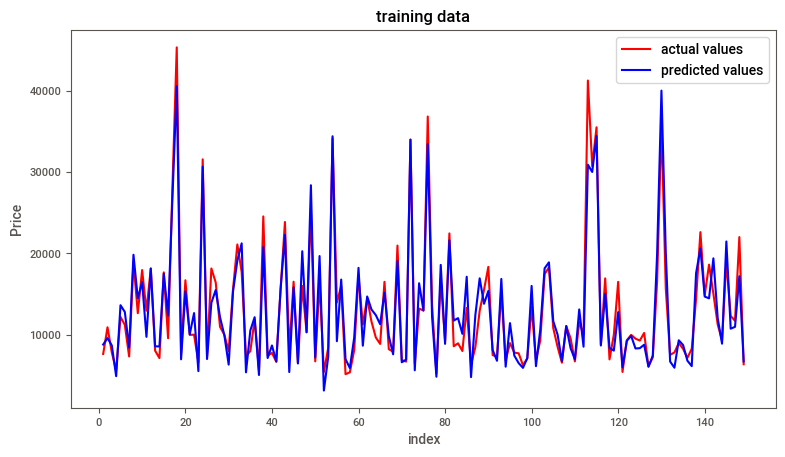

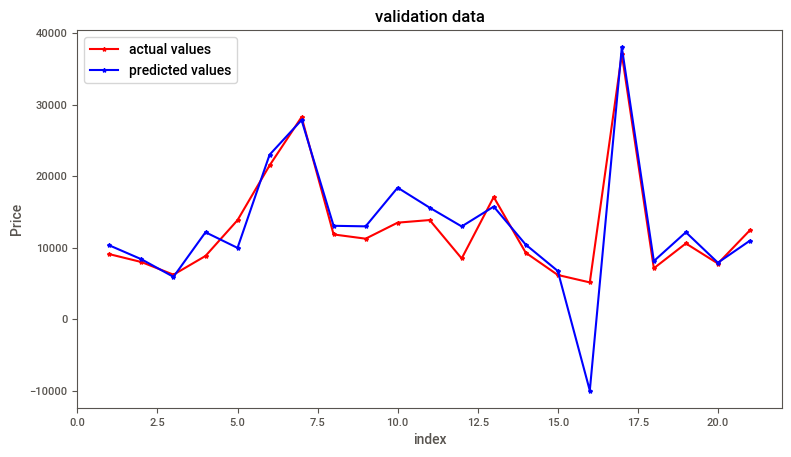

In [171]:
train_model(linear,X_train2,y_train2,X_val,y_val)

* As we can see the model fits the training data well but it is not able to generalize well on the validation data.
* The accuracy score is well under 80% and the error is too high because the data might not be linear.


### Support Vector Machine

train_absoulute error:2995.281879194631
tran-r2_score:0.28683731366129694
r2_score:0.7135688930726154
absolute_error:2777.9523809523807
squared_error:16588456.714285715
accuracy:0.0 %


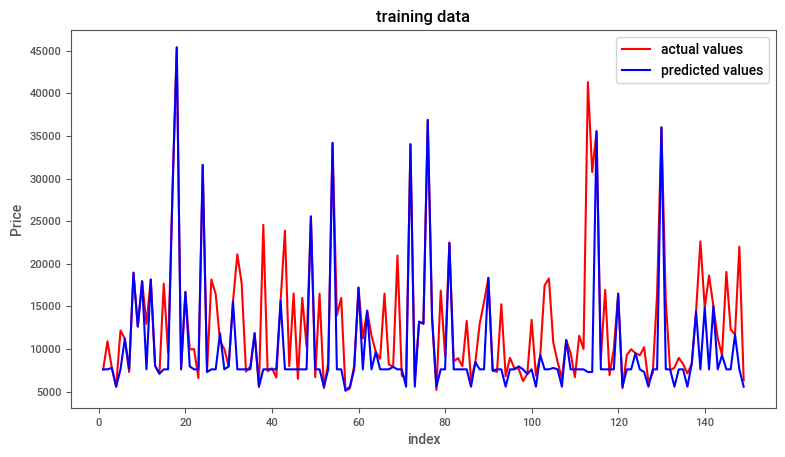

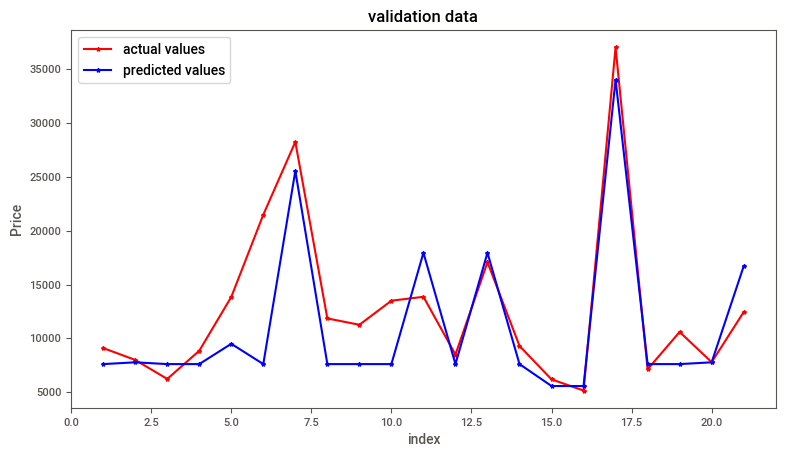

In [172]:

train_model(svm,X_train2,y_train2,X_val,y_val)

* SVM is clearly underfitting here.
* The model is neither finding any patterns in the data nor generalizing well on validation data.

### Decision Tree

train_absoulute error:12.194630872483222
tran-r2_score:0.9999062392110147
r2_score:0.937185321716038
absolute_error:1502.904761904762
squared_error:3637868.0476190476
accuracy:93.72 %


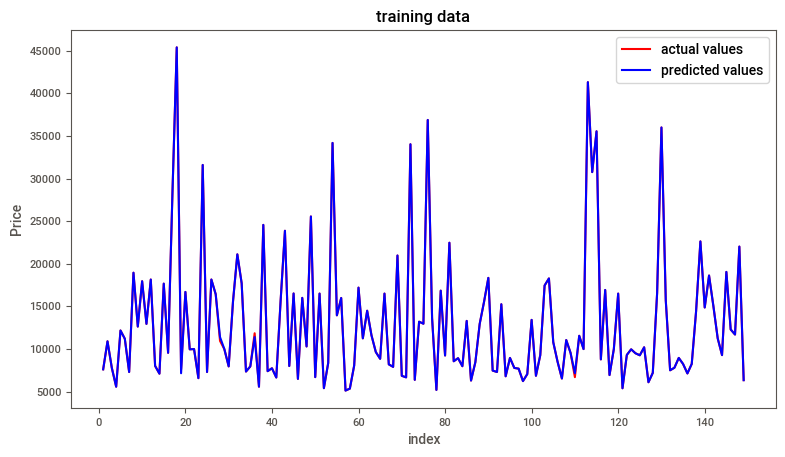

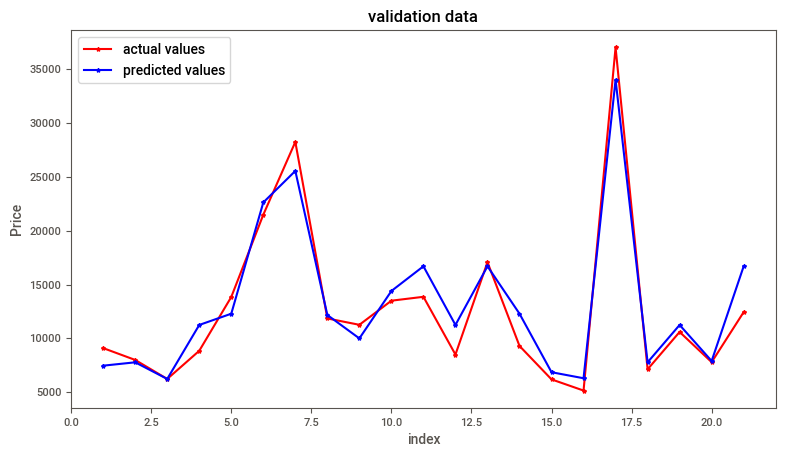

In [173]:
train_model(tree,X_train2,y_train2,X_val,y_val)

* Decision tree is actually performing quite well here.
* If we look at the graph on training data,it can observed that the model is kind of overfitting the training data.But it is still able to generalize well on the validation set.
* And the accuracy is well above 90% which is good enough.

### Random Forest

train_absoulute error:600.8140659955258
tran-r2_score:0.9838142689997225
r2_score:0.84422762006659
absolute_error:2232.4095238095238
squared_error:9021448.15738095
accuracy:84.42 %


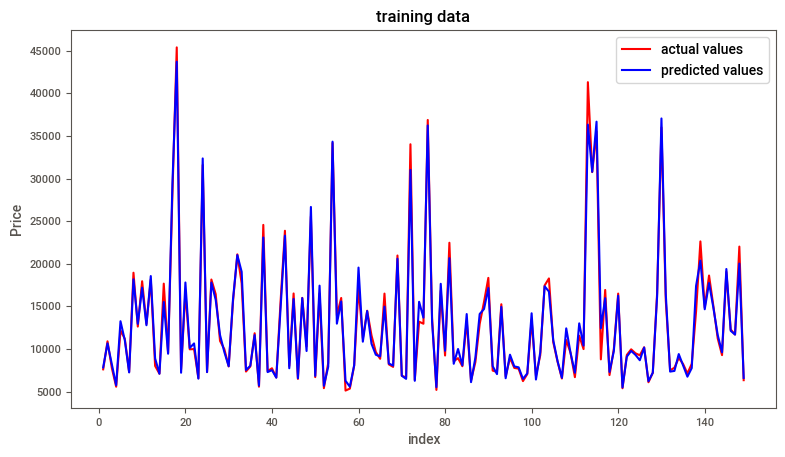

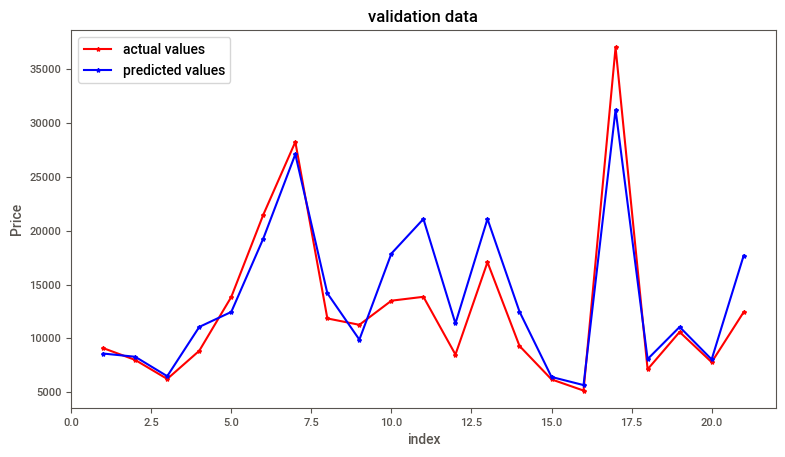

In [174]:
train_model(rf,X_train2,y_train2,X_val,y_val)

* Random forest is also performing well but the error is little higher than that of Decision tree.
* Unlike Decision tree it is not performing too well on the training data,but still the accuracy is above 80%.

#### XGBOOST

train_absoulute error:16.058773988045303
tran-r2_score:0.9999056643874367
r2_score:0.9104866287929612
absolute_error:1651.7271437872023
squared_error:5184104.127329293
accuracy:91.05 %


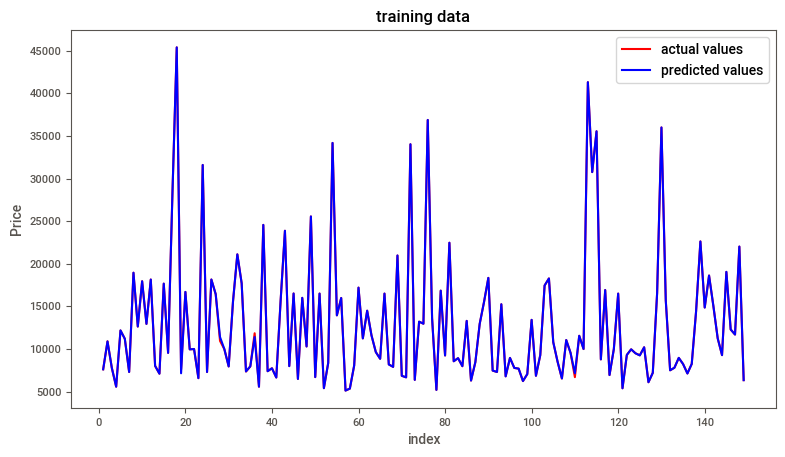

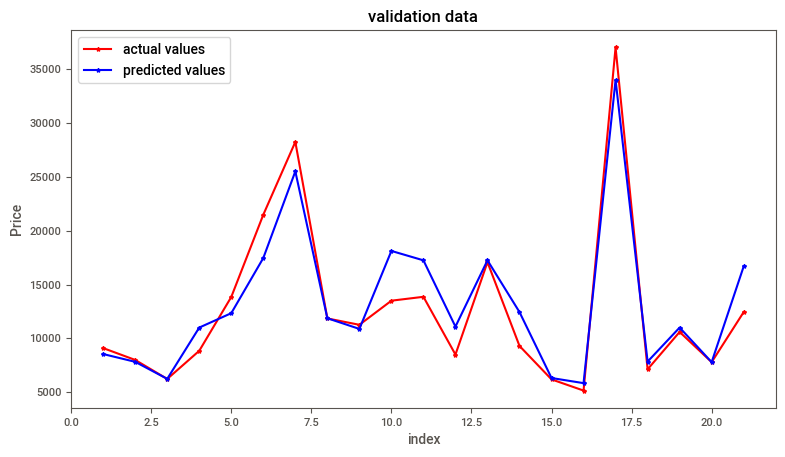

In [175]:
train_model(xgb,X_train2,y_train2,X_val,y_val)

* As we can see XGBoost is performing extremely well on the training data and it is able to generalize better on the validation data.
* Compared to Decision tree the error is on the higher side that is because XGBoost doesnt perform that well on small data sets.

Among all the models we tried,clearly Decision tree is outperforming all the other models but a single decision tree is a weak learner and it will not be able to generalize well.Hence it is better to use either ensemble or boosting technique.Since xgboost is producing better results than RandomForest we wil be using XGBoost for further prediction.

Lets see if we can improve accuracy and reduce the error with some hyperparameter tuning.

## Hyperparameter Tuning


In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [98]:
n_estimators = [int(x) for x in np.linspace(start=50,stop=2000,num=20)]
max_depth = [3,4,5,6,10,15,20] 
learning_rate=[0.1,0.2,0.3] 
gamma=[0, 1, 2, 3, 4] 
min_child_weight=[1,2,3]
subsample=[0.5,0.7,1]
colsample_bytree=[0.5,0.7,1]

params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators, 'gamma':gamma,
     'min_child_weight':min_child_weight, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

In [99]:
rcv=RandomizedSearchCV(xgb,scoring='neg_mean_squared_error',cv=3,param_distributions=params,n_jobs=-1,verbose=3,n_iter=400)

In [100]:
rcv.fit(X_train,y_train)

In [101]:
#Getting the best parameters
rcv.best_params_

In [102]:
xgb_tuned=XGBRegressor(subsample=0.7,n_estimators=50,min_child_weight=3,max_depth=10,learning_rate=0.1,gamma=0,colsample_bytree=0.5)

In [103]:
#Training the model on full training set(including validation set)
xgb_tuned.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
#predicting the test data
y_preds2=xgb_tuned.predict(X_test)

## Evaluation

#### Accuracy

In [105]:
accuracy=xgb_tuned.score(X_test,y_test)
print(f'{round(accuracy*100,2)}%')

96.85%


We have achieved a accuracy score close to 95% which is good enough.

##### Lets look at the actual price and the predicted price in a single dataframe,it will give us the clear picture about how well the model is able to predict the price of the car.

In [106]:
actual_y=pd.DataFrame(y_test)
actual_y.reset_index(drop=True,inplace=True)

In [107]:
predicted_y=(pd.DataFrame(y_preds2,columns=['Predicted Price']))
predicted_y.reset_index(drop=True,inplace=True)

In [108]:
final_preds=pd.concat([actual_y,predicted_y],axis=1)

In [109]:
final_preds

,price,Predicted Price
0,6918,7367.245605
1,7603,7359.911621
2,8189,8564.743164
3,18420,18585.683594
4,19699,20367.681641
5,9895,9521.541016
6,40960,38006.609375
7,10345,9083.236328
8,7895,9013.896484
9,16630,14761.490234


* As we can see the most of the predictions are close to the actual price,there is no massive difference(error).
* But in few of the cases the predictions are too far from actual price.

#### R2_score

In [110]:
print(r2_score(y_test,y_preds2))

0.9685318998677942


With r2_score of 0.96 we can say that model was was able to reproduce most of the observations it learnt from.But the score keeps on increasing on as we add terms.

#### Mean Absolute Error

In [111]:
print(mean_absolute_error(y_test,y_preds2))

1245.188525390625


* The Mean absolute error is close to 1250 which is actually on quite higher side but still not too high considering the average price of the car which is approximately 13000 USD.
* Model is predicting the price of a car with an error of approximately 1 thousand USD.
* The error is around 10% of the mean and as we saw earlier in the dataframe ,the model has done pretty good job in predicting the price.


#### Mean Squared Error and RMSE

In [112]:
print(mean_squared_error(y_test,y_preds2))

2679966.434144314


In [113]:
print(np.sqrt(mean_squared_error(y_test,y_preds2)))

1637.0603025375437


* The model has RMSE just above 1600 which is actually reliable considering the mean.
* The prediction points are not that far from the actual data points.


#### Lets plot the mean absolute error

In [160]:
error=[]
for i in range(0,len(y_test),1):
    a=abs(final_preds['price'][i] - final_preds['Predicted Price'][i])
    error.append(a)

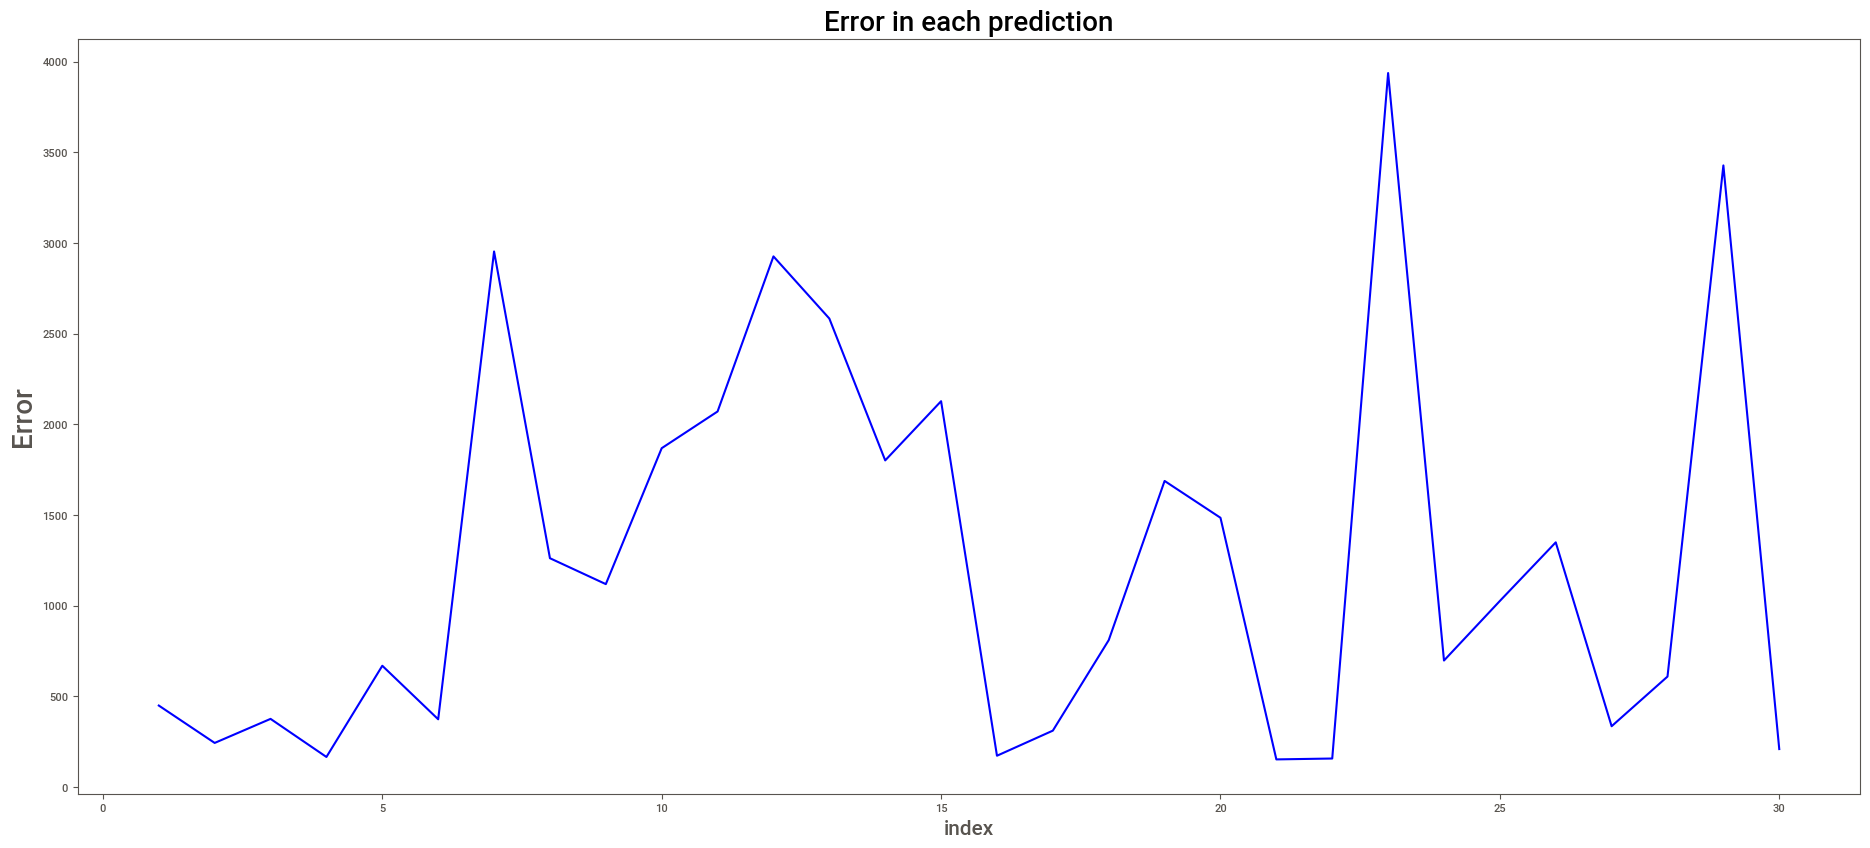

In [162]:
# Mean Absolute Error
c=[i for i in range(1,len(y_test)+1,1)]
plt.plot(c,error,linestyle='-',color='b')
plt.xlabel('index',fontsize=15)
plt.ylabel('Error',fontsize=20)
plt.title('Error in each prediction',fontsize=20)
plt.show()

* Sometimes the error is too high,understandably it is for costlier cars.
* The error keeps on varying depending upon the the price of car,higher the car price higher the error.

In [184]:
#Finally lets take a look at the actual price and predicted price once again.
final_preds

,price,Predicted Price
0,6918,7367.245605
1,7603,7359.911621
2,8189,8564.743164
3,18420,18585.683594
4,19699,20367.681641
5,9895,9521.541016
6,40960,38006.609375
7,10345,9083.236328
8,7895,9013.896484
9,16630,14761.490234


In [185]:
#Printing each of the metrics once again
print(f'The accuracy score is: {round(accuracy,2)*100}%')
print(f'The r_2 score is :{r2_score(y_test,y_preds2)}')
print(f'The mean absolute error is :{mean_absolute_error(y_test,y_preds2)}')
print(f'The mean squared error is : {mean_squared_error(y_test,y_preds2)}')

The accuracy score is: 97.0%
The r_2 score is :0.9685318998677942
The mean absolute error is :1245.188525390625
The mean squared error is : 2679966.434144314


### Conclusion

In this project we followed everystep starting from basic checks,then cleaning the data,followed by visualization,at last scaling the data.Since almost every feature contributes in deciding the price of the car,we had to compare each of them with price by visualizing which was the one of the important step in this project.The dataset did have some missing values which were imputed.<br />
We tried out several models and evaluated each of them with validation set to determine the one with the highest performance.Plotting the actual data points with predicted data points gave us the clear picture about each model's performance.XGBoost was able to generalize better than other models hence we chose XGBoost.
Since the Dataset had very less observations the performance was not the best we could have achieved,however we were able to reach the accuracy score over 95% which is good enough.With the mean absolute error of 1200 which is okay considering the price of the car.The error of 1000 dollars is not a big deal for cars with higher prices but anyway error was less for low budget cars.<br />
Movig forward the model can be improved if it is trained with more observations but overall the current performance is reliable for any car dealers.
